# Notes for Circle:
https://stackoverflow.com/questions/491738/how-do-you-calculate-the-average-of-a-set-of-circular-data


In [499]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Exploratory stuff from 2nd half of September

## Plot max expression angles for all genes

## Get angles for each time course point

## Scale each micro-array value with GTEX median tpm, for now, whole blood

## Decide on phase separation on the circle - visual for now

## Export micro-array data as single-cell dataset to classify with Seurat - see if have some coherence

In [4]:
# Read in the GTex Data pick tissue to use for normalization
#gtex paper: cite? https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4010069/
# https://gtexportal.org/home/datasets
# This file contains the median TPM by tissue. These medians were calculated directly from the file GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz.
# wget https://storage.googleapis.com/gtex_analysis_v7/rna_seq_data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct.gz
# for now, picking whole blood
import pandas as pd
tpm_df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct", sep='\t')
gene_name_to_tpm_dict = dict()
for index, row in tpm_df.iterrows():
    gene_name_to_tpm_dict[row["Description"]] = row["Whole Blood"]


In [5]:
# Read in the micro-array data - so far only founds matches between 1230 genes in whitfield in the 56K genes from GTEX
# TODO - get better name mapping
import math
import pandas as pd
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

gene_names_with_micro_array_data = list()

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
names_for_all_time_courses_list = list()
gene_name_to_time_course_expressions_dict = dict()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t4_" + str(i))
    
for index, row in whitfield_micro_array_df.iterrows():
    count +=1
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            #print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (gene_name in gene_name_to_tpm_dict and not(gene_name in gene_names_with_micro_array_data)):
                
                
                ####!!!! cut-off to have just a few top cycling genes
                scaled_fourier_score = float(row['Scaled Fourier'])
                #if (scaled_fourier_score < 10.0):
                 #   continue
                tpm = gene_name_to_tpm_dict[gene_name]
                #print(gene_name + " is found")
                gene_names_with_micro_array_data.append(gene_name)
                count_found += 1
                gene_name_to_time_course_expressions_dict[gene_name] = dict()
                gene_name_to_time_course_expressions_dict[gene_name]["one"] = list()
                
                
                new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[11:31] = new_row
            
                new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[32:56] = new_row
                
                new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[57:81] = new_row
                
                new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[82:105] = new_row
                
                
                #TODO: for now adding zero to missing time courses and samples - valid for all things?
                
                for i in range(11,31):
                    gene_name_to_time_course_expressions_dict[gene_name]["one"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["two"] = list()
                for i in range(32,56):
                    gene_name_to_time_course_expressions_dict[gene_name]["two"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["three"] = list()
                for i in range(57,81):
                    gene_name_to_time_course_expressions_dict[gene_name]["three"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["four"] = list()
                for i in range(82,105):
                    gene_name_to_time_course_expressions_dict[gene_name]["four"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
    
                gene_name_to_time_course_expressions_dict[gene_name]["sine"] = row['Sin']
                gene_name_to_time_course_expressions_dict[gene_name]["cosine"] = row['Cos']
                gene_name_to_time_course_expressions_dict[gene_name]["phase"] = row['Phase'].strip()
print(count_found)
#print(gene_name_to_time_course_expressions_dict['KLF6'])

#print(gene_name_to_time_course_expressions_dict["PITPNC1"])

1230


In [31]:
## make micro-array dataframe for seurat's input
import csv
count = 0
whitfield_subset_micro_array_df = pd.DataFrame(columns = names_for_all_time_courses_list)
for gene_name in gene_names_with_micro_array_data:
    count += 1
    whitfield_subset_micro_array_df.loc[gene_name] = gene_name_to_time_course_expressions_dict[gene_name]["one"] + gene_name_to_time_course_expressions_dict[gene_name]["two"] + gene_name_to_time_course_expressions_dict[gene_name]["three"] + gene_name_to_time_course_expressions_dict[gene_name]["four"]
print(count)
whitfield_subset_micro_array_df.to_csv("whitfield_micro_array_as_sc.csv", sep='\t', index=True)

1230


In [53]:
## read in the Seurat phase assignments 

angles_list = time_course_1_angles_list + time_course_2_angles_list + time_course_3_angles_list + time_course_4_angles_list

whitfield_seurat_df = pd.read_csv("whitfield_micro_seurat_labels.csv", sep=',')
whitfield_seurat_phase_list = list()
for index, row in whitfield_seurat_df.iterrows():
    whitfield_seurat_phase_list.append(row["Phase"])
    
whitfield_seurat_df = pd.read_csv("whitfield_micro_seurat_labels_short_list.csv", sep=',')
whitfield_seurat_short_list_phase_list = list()
for index, row in whitfield_seurat_df.iterrows():
    whitfield_seurat_short_list_phase_list.append(row["Phase"])
    

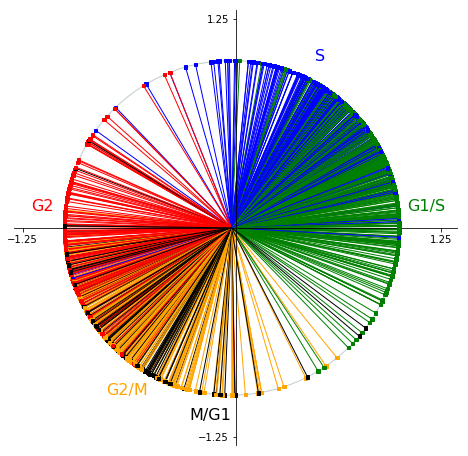

In [17]:
from pylab import *
figure(figsize=(8,8))


#### All Genes
ax=subplot(111, aspect='equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 2.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 2.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)
#circles(1, 0, 0.5, 'r', alpha=0.2, lw=5, edgecolor='b', transform=ax.transAxes)

#plot a set of circles (circles in diagonal)
#a=arange(11)
#out = circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')

# Create a Rectangle patches
for gene_name in gene_names_with_micro_array_data:
    use_color = 'gray'
    if (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G1/S'):
        use_color = 'green'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'S'):
        use_color = 'blue'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2'):
        use_color = 'red'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2/M'):
        use_color = 'orange'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'M/G1'):
        use_color = 'black'
    rect = Rectangle((gene_name_to_time_course_expressions_dict[gene_name]["cosine"]-0.01,gene_name_to_time_course_expressions_dict[gene_name]["sine"]-0.01),0.02,0.02,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=9)
    line = Line2D([gene_name_to_time_course_expressions_dict[gene_name]["cosine"],0],[gene_name_to_time_course_expressions_dict[gene_name]["sine"],0], color=use_color,linewidth=1)
    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.add_line(line)
    
text(1.05, 0.1, "G1/S", color='green', fontsize=16)
text(0.5, 1, "S", color='blue', fontsize=16)
text(-1.2, 0.1, "G2", color='red', fontsize=16)
text(-0.75, -1, "G2/M", color='orange', fontsize=16)
text(-0.25, -1.15, "M/G1", color='black', fontsize=16)

xlim(-1.3,1.35)
ylim(-1.3, 1.3)

show()
#title("Micro-Array Angles and Phases Of Genes\n", fontsize=16)

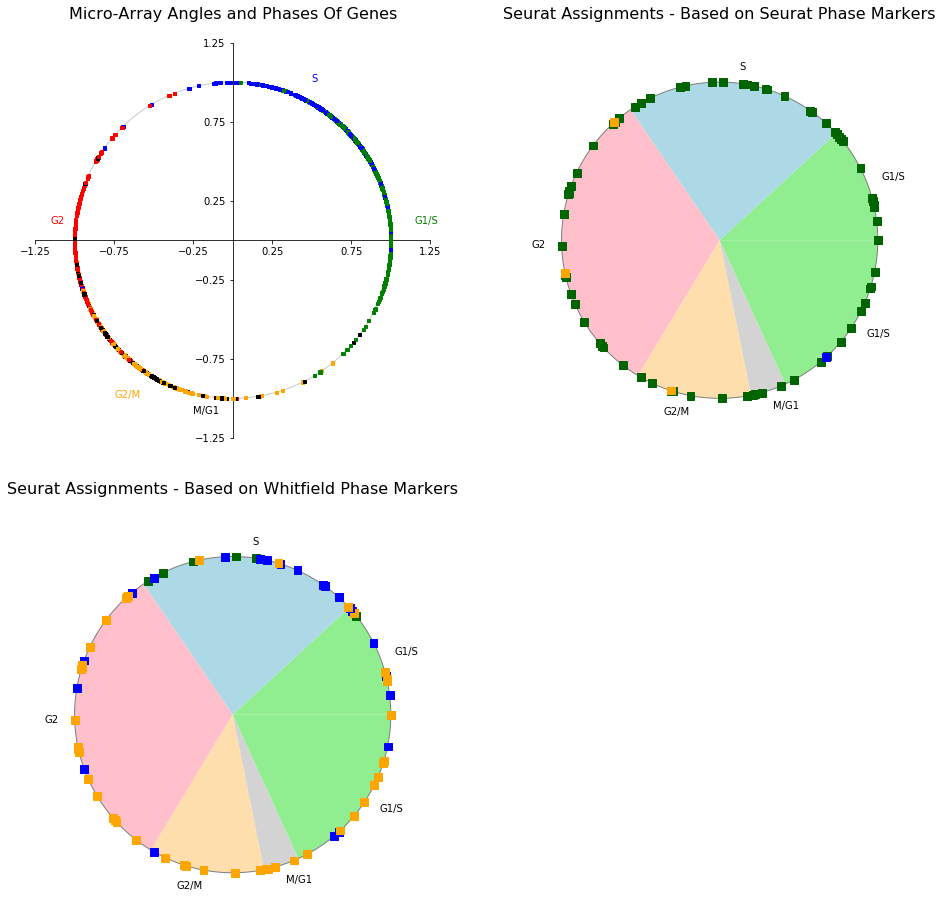

In [55]:
#print(whitfield_subset_micro_array_df)
#print(whitfield_subset_micro_array_df.sum(axis=0))
from pylab import *
figure(figsize=(16,16))


#### All Genes
ax=subplot(221, aspect='equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)
#circles(1, 0, 0.5, 'r', alpha=0.2, lw=5, edgecolor='b', transform=ax.transAxes)

#plot a set of circles (circles in diagonal)
#a=arange(11)
#out = circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')

# Create a Rectangle patches
for gene_name in gene_names_with_micro_array_data:
    use_color = 'gray'
    if (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G1/S'):
        use_color = 'green'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'S'):
        use_color = 'blue'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2'):
        use_color = 'red'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2/M'):
        use_color = 'orange'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'M/G1'):
        use_color = 'black'
    rect = Rectangle((gene_name_to_time_course_expressions_dict[gene_name]["cosine"]-0.01,gene_name_to_time_course_expressions_dict[gene_name]["sine"]-0.01),0.02,0.02,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=9)
    # Add the patch to the Axes
    ax.add_patch(rect)
    
text(1.15, 0.1, "G1/S", color='green')
text(0.5, 1, "S", color='blue')
text(-1.15, 0.1, "G2", color='red')
text(-0.75, -1, "G2/M", color='orange')
text(-0.25, -1.1, "M/G1", color='black')

title("Micro-Array Angles and Phases Of Genes\n", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(222, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,len(angles_list)):
    use_color = 'gray'
    if (whitfield_seurat_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (whitfield_seurat_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 9
    elif (whitfield_seurat_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("Seurat Assignments - Based on Seurat Phase Markers\n", fontsize=16)

# Phase segmentation on the circle
ax=subplot(223, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,len(angles_list)):
    use_color = 'gray'
    if (whitfield_seurat_short_list_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (whitfield_seurat_short_list_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 9
    elif (whitfield_seurat_short_list_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("Seurat Assignments - Based on Whitfield Phase Markers\n", fontsize=16)

xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()


# Seurat Assignments for Our Human MicroArray, By Individual Time Courses

## Try To See if Seurat Can Properly Quantify the Stahlberg Single Cell Data

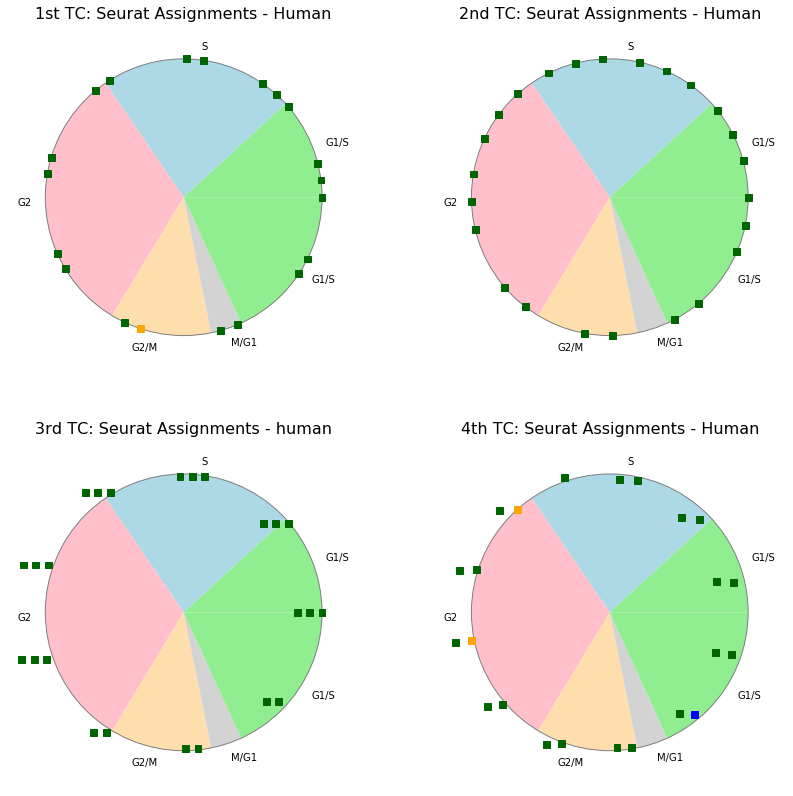

In [189]:
#print(whitfield_subset_micro_array_df)
#print(whitfield_subset_micro_array_df.sum(axis=0))
from pylab import *
figure(figsize=(14,14))



##########
# Phase segmentation on the circle
ax=subplot(221, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,20):
    use_color = 'gray'
    if (whitfield_seurat_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (whitfield_seurat_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 9
    elif (whitfield_seurat_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 8
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("1st TC: Seurat Assignments - Human", fontsize=16)


##########
# Phase segmentation on the circle
ax=subplot(222, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(20,44):
    use_color = 'gray'
    if (whitfield_seurat_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (whitfield_seurat_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (whitfield_seurat_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("2nd TC: Seurat Assignments - Human", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(223, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(44,68):
    use_color = 'gray'
    offset = (i-44) * 0.01
    if (whitfield_seurat_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (whitfield_seurat_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (whitfield_seurat_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025-offset,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("3rd TC: Seurat Assignments - human", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(224, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(68,91):
    use_color = 'gray'
    offset = (i-68) * 0.01
    if (whitfield_seurat_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (whitfield_seurat_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (whitfield_seurat_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025-offset,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("4th TC: Seurat Assignments - Human", fontsize=16)


xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()

# Feed Bautner 182 to Seurat to get F1 score and phase assignments

In [514]:
# Buetner 182 1:1 RUN this cell
import h5py
ftst = h5py.File("normCountsBuettnerEtAl.h5f",'r')
print([key for key in ftst.keys()])
cell_names = ftst['labels'][:]
print(ftst['labels'][:])
gene_names_all = ftst['sym_names'][:]
gene_names_all = [x.decode('utf-8').upper() for x in gene_names_all]
gene_names_all = gene_names_all[0:38293]
print(len(gene_names_all))
print(gene_names_all[38292])
YT = ftst['LogNcountsMmus'][:]
print(YT.shape)
print(YT[0][0])
string_labels = []
count = 1
for label in cell_names:
    if ("1" in str(label)):
        string_labels.append(str(count) + "_G1")
    if ("2" in str(label)):
        string_labels.append(str(count) + "_S")
    if ("3" in str(label)):
        string_labels.append(str(count) + "_G2")
    count += 1
print(string_labels)    
SC_df = pd.DataFrame(YT.T)
SC_df.columns = string_labels
SC_df.index = gene_names_all
SC_df = SC_df[~SC_df.index.duplicated(keep='first')]
print(SC_df.shape)
print(SC_df["1_G1"]["NAV1"])
SC_df.to_csv("bautner182_as_sc.csv", sep='\t', index=True)

['EnsIds', 'LogNcountsMmus', 'LogVar_techMmus', 'ccCBall_gene_indices', 'cellcyclegenes', 'cellcyclegenes_filter', 'countsERCCAll', 'countsMmusAll', 'genes_heterogen', 'labels', 'nCountsERCC', 'nCountsMmus', 'ratioEndo', 'sfCellSize', 'sfEndo', 'sym_names', 'sym_names_het']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
38293
RP23-429I18.1
(182, 38293)
1.9756283615099042
['1_G1', '2_G1', '3_G1', '4_G1', '5_G1', '6_G1', '7_G1', '8_G1', '9_G1', '10_G1', '11_G1', '12_G1', '13_G1', '14_G1', '15_G1', '16_G1', '17_G1', '18_G1', '19_G1', '20_G1', '21_G1', '22_G1', '23_G1', '24_G1', '25_G1', '26_G1', '27_G1', '28_G1', '29_G1', '30_G1', '31_G1', '32_G1', '33_G1', '34_G1', '35_G

# Feed BulkmESC to Seurat to get phase assignments and get F1 score

In [531]:
# data_mESCbulk.h5f 1:1 RUN this cell
import h5py
import csv

SC_df = pd.DataFrame()
ftst = h5py.File("data_mESCbulk.h5f",'r')
print([key for key in ftst.keys()])
print(ftst['labels'][:])
gene_names_all = ftst['sym_names'][:]
gene_names_all = [x.decode('utf-8').upper() for x in gene_names_all]
print(len(gene_names_all))
YT = ftst['counts'][:]
YT = YT[[0,1,3],:]
print(YT.shape)
labels = ["G1", "S", "G2M"]

SC_df = pd.DataFrame(YT.T)
SC_df.columns = labels
SC_df.index = gene_names_all
SC_df = SC_df[~SC_df.index.duplicated(keep='first')]
print(SC_df.shape)
SC_df.to_csv("bulk_mESC_as_sc.csv", sep='\t', index=True)

['class_labels', 'counts', 'ensIds', 'labels', 'sym_names']
[1. 2. 4. 3.]
38293
(3, 38293)
(38050, 3)


In [533]:
bulk_mESC_seurat_df = pd.read_csv("labels_bulk_mESC_as_sc.csv", sep=',')

S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0

all_count = 0
correct_count = 0
for index, row in bulk_mESC_seurat_df.iterrows():
    all_count += 1
    if ("G1" in row[0] and row["Phase"] == "G1"):
        correct_count += 1
    if ("S" in row[0] and row["Phase"] == "S"):
        correct_count += 1  
    if ("G2" in row[0] and row["Phase"] == "G2M"):
        correct_count += 1
    
    if ("S" in row[0]):
        if (row["Phase"] == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (row["Phase"] == "G2M"):
                G2M_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("G2" in row[0]):
        if (row["Phase"] == "G2M"):
            G2M_tp += 1
        else:
            G2M_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("G1" in row[0]):
        if (row["Phase"] == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G2M"):
                G2M_fp += 1 

print("Correct Coun")
print(correct_count)
print("Percent Accuracy")
print(correct_count/all_count)

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

Correct Coun
2
Percent Accuracy
0.6666666666666666
F1_score
0.5714285714285715


# Feed Big_930 dataset to Seurat to get phase assigments and get F1 score

In [509]:
# 930 Dataset, RUN This 1:1

import csv

SC_df = pd.DataFrame()

column_names = []
with open('Dataset930.csv') as f:
    reader = csv.reader(f, delimiter="\t")
    next(reader)
    counter = 0
    full_row = []
    gene_name = ""
    for row in reader:
        if (counter < 930):
            phase = ""
            if (row[1] == "g0/g1"):
                phase = "G1"
            elif (row[1] == "s"):
                phase = "S"
            elif (row[1] == "g2/m"):
                phase = "G2"
            name = "cell_" + str(counter) + "_" + phase
            column_names.append(name)
        if (counter%930 == 0 and counter > 0):
            SC_df[gene_name] = full_row
            #print(full_row)
            full_row = []
            
        full_row.append(float(row[9]))
        gene_name = row[6]
        
        counter += 1
SC_df = SC_df.T
SC_df.columns = column_names

seurat_genes = [line.rstrip('\n') for line in open('regev_lab_cell_cycle_genes.txt')]
seurat_intersect_genes = list()
for gene in seurat_genes:
    if gene in SC_df.index:
        seurat_intersect_genes.append(gene)
        
SC_seurat_df = SC_df.loc[seurat_intersect_genes]
SC_no_seurat_df = SC_df.drop(SC_seurat_df.index)
#print(stahlberg_MCF7_no_seurat_df)

dfs = dict()
dfs["orig"] = SC_df
for i in range(0, 29):
    name = "df_" + str(i)
    dfs[name] = SC_no_seurat_df.rename(lambda x: x + "_" + str(i))
expanded_SC_df = pd.concat(dfs.values())
#print(expanded_stahlberg_MCF7_df)
expanded_SC_df.to_csv("expanded_Big_930_as_sc.csv", sep='\t', index=True)


#SC_df.to_csv("Big_930_as_sc.csv", sep='\t', index=True)

In [510]:
big_930_seurat_df = pd.read_csv("labels_expanded_Big_930_as_sc.csv", sep=',')

S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0

all_count = 0
correct_count = 0
for index, row in big_930_seurat_df.iterrows():
    all_count += 1
    if ("_G1" in row[0] and row["Phase"] == "G1"):
        correct_count += 1
    if ("_S" in row[0] and row["Phase"] == "S"):
        correct_count += 1  
    if ("_G2" in row[0] and row["Phase"] == "G2M"):
        correct_count += 1
    
    if ("_S" in row[0]):
        if (row["Phase"] == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (row["Phase"] == "G2M"):
                G2M_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G2" in row[0]):
        if (row["Phase"] == "G2M"):
            G2M_tp += 1
        else:
            G2M_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G1" in row[0]):
        if (row["Phase"] == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G2M"):
                G2M_fp += 1 

print("Correct Coun")
print(correct_count)
print("Percent Accuracy")
print(correct_count/all_count)

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

Correct Count out of 91
429
Percent Accuracy
0.4612903225806452
F1_score
0.44449691602371116


# Feed Stahlberg Dataset to Seurat to get phase assignments, and get F1 score
## needed to expand the dataset by just increasing all the genes not used for Seurat phase assignment by 30x, to have a large enough set

In [186]:
### process Stahlberg single cell data for Seurat input
stahlberg_MCF7_df = pd.read_csv("Stahlberg_MCF7_group_1_to_6.csv", sep=',')
def phase_to_string(phase_number):
    if (phase_number in (1, 4, 9)):
        return "G1"
    if (phase_number in (2, 5, 10)):
        return "S"
    if (phase_number in (3, 6, 11)):
        return "G2"
stahlberg_MCF7_df = stahlberg_MCF7_df.rename(lambda x: x + "_" + phase_to_string(int(stahlberg_MCF7_df.loc[x, "#Group"])))
stahlberg_MCF7_df = stahlberg_MCF7_df.iloc[:,:-3]
stahlberg_MCF7_df = stahlberg_MCF7_df.replace(-1,0.0).T
#print(stahlberg_MCF7_df)

seurat_genes = [line.rstrip('\n') for line in open('regev_lab_cell_cycle_genes.txt')]
seurat_intersect_genes = list()
for gene in seurat_genes:
    if gene in stahlberg_MCF7_df.index:
        seurat_intersect_genes.append(gene)
        
stahlberg_MCF7_seurat_df = stahlberg_MCF7_df.loc[seurat_intersect_genes]
stahlberg_MCF7_no_seurat_df = stahlberg_MCF7_df.drop(stahlberg_MCF7_seurat_df.index)
#print(stahlberg_MCF7_no_seurat_df)

dfs = dict()
dfs["orig"] = stahlberg_MCF7_df
for i in range(0, 29):
    name = "df_" + str(i)
    dfs[name] = stahlberg_MCF7_no_seurat_df.rename(lambda x: x + "_" + str(i))
expanded_stahlberg_MCF7_df = pd.concat(dfs.values())
#print(expanded_stahlberg_MCF7_df)
expanded_stahlberg_MCF7_df.to_csv("expanded_stahlberg_MCF7_as_sc.csv", sep='\t', index=True)

In [270]:

stahlberg_seurat_df = pd.read_csv("stahlberg_seurat_labels.csv", sep=',')

S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0

all_count = 0
correct_count = 0
for index, row in stahlberg_seurat_df.iterrows():
    all_count += 1
    if ("_G1" in row[0] and row["Phase"] == "G1"):
        correct_count += 1
    if ("_S" in row[0] and row["Phase"] == "S"):
        correct_count += 1  
    if ("_G2" in row[0] and row["Phase"] == "G2M"):
        correct_count += 1
    
    if ("_S" in row[0]):
        if (row["Phase"] == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (row["Phase"] == "G2M"):
                G2M_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G2" in row[0]):
        if (row["Phase"] == "G2M"):
            G2M_tp += 1
        else:
            G2M_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G1" in row[0]):
        if (row["Phase"] == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G2M"):
                G2M_fp += 1 

print("Correct Count out of 91")
print(correct_count)
print("Percent Accuracy")
print(correct_count/all_count)

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

Correct Count out of 91
51
Percent Accuracy
0.5666666666666667
F1_score
0.5838824120039116


# Try to get a different dataset to work with Seurat:
# scale the micro-array with mouse hameopotetic progenitor cells TPM values,
# add this to the Nesterova Dataset to augment it (using intersecting gene set)
# read in the assignments to just our micro-array points by Seurat...
# if fails, check again how Seurat does picking - is it really col-normalized???

In [142]:
# Download EMBL Expression Atlas Data, and get TPMP for progenitor cells
# https://www.ebi.ac.uk/gxa/experiments/E-MTAB-3079/Downloads
# EMBL_Murine_Hematopoietic_progenitors_TPMS.tsv

mouse_tpm_df = pd.read_csv("EMBL_Murine_Hematopoietic_progenitors_TPMS.tsv", sep='\t')
mouse_gene_name_to_tpm_dict = dict()
for index, row in mouse_tpm_df.iterrows():
    tpm =  row["Kit and Sca1-positive hematopoietic stem cell"]
    if (str(tpm) != "nan"):
        mouse_gene_name_to_tpm_dict[row["Gene Name"].upper()]  = tpm

In [185]:
#print(mouse_gene_name_to_tpm_dict["HSPA1A"])

In [144]:
# Read in the micro-array data - get matches between in whitfield and EMBL mouse genes
# TODO - get better name mapping
import math
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

mouse_gene_names_with_micro_array_data = list()

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
mouse_names_for_all_time_courses_list = list()
mouse_gene_name_to_time_course_expressions_dict = dict()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    mouse_names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    mouse_names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    mouse_names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    mouse_names_for_all_time_courses_list.append("t4_" + str(i))
    
for index, row in whitfield_micro_array_df.iterrows():
    count +=1
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            #print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (gene_name in mouse_gene_name_to_tpm_dict and not(gene_name in mouse_gene_names_with_micro_array_data)):
                
                
                ####!!!! cut-off to have just a few top cycling genes
                scaled_fourier_score = float(row['Scaled Fourier'])
                #if (scaled_fourier_score < 10.0):
                 #   continue
                tpm = mouse_gene_name_to_tpm_dict[gene_name]
                #print(gene_name + " is found")
                mouse_gene_names_with_micro_array_data.append(gene_name)
                count_found += 1
                mouse_gene_name_to_time_course_expressions_dict[gene_name] = dict()
                
                new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[11:31] = new_row
            
                new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[32:56] = new_row
                
                new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[57:81] = new_row
                
                new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[82:105] = new_row
                
                
                #TODO: for now adding zero to missing time courses and samples - valid for all things?
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["one"] = list()
                for i in range(11,31):
                    mouse_gene_name_to_time_course_expressions_dict[gene_name]["one"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["two"] = list()
                for i in range(32,56):
                    mouse_gene_name_to_time_course_expressions_dict[gene_name]["two"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["three"] = list()
                for i in range(57,81):
                    mouse_gene_name_to_time_course_expressions_dict[gene_name]["three"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["four"] = list()
                for i in range(82,105):
                    mouse_gene_name_to_time_course_expressions_dict[gene_name]["four"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
    
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["sine"] = row['Sin']
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["cosine"] = row['Cos']
                mouse_gene_name_to_time_course_expressions_dict[gene_name]["phase"] = row['Phase'].strip()
                
                if (gene_name == "HSPA1A"):
                    print(mouse_gene_name_to_time_course_expressions_dict[gene_name])
                    print("_" + str(tpm) + "_")
print(count_found)

1002


In [145]:
print(len(mouse_gene_names_with_micro_array_data))
nesterova_df = pd.read_table("nestorawa_forcellcycle_expressionMatrix.txt", index_col = 0)
nesterova_gene_names = nesterova_df.index.values

1002


In [146]:
common_mouse_microarray_and_nesterova_genes = list()
for gene_name in mouse_gene_names_with_micro_array_data:
    if (gene_name in nesterova_gene_names):
        common_mouse_microarray_and_nesterova_genes.append(gene_name)
print(len(common_mouse_microarray_and_nesterova_genes))

1000


In [163]:
# make a common dataset for the intersection
nesterova_mouse_subset_df = nesterova_df.loc[common_mouse_microarray_and_nesterova_genes]
whitfield_mouse_micro_array_df = pd.DataFrame(columns = mouse_names_for_all_time_courses_list)
for gene_name in common_mouse_microarray_and_nesterova_genes:
    whitfield_mouse_micro_array_df.loc[gene_name] = mouse_gene_name_to_time_course_expressions_dict[gene_name]["one"] + mouse_gene_name_to_time_course_expressions_dict[gene_name]["two"] + mouse_gene_name_to_time_course_expressions_dict[gene_name]["three"] + mouse_gene_name_to_time_course_expressions_dict[gene_name]["four"]
nesterova_plus_micro_array_df = pd.concat([nesterova_mouse_subset_df, whitfield_mouse_micro_array_df], axis=1)
nesterova_plus_micro_array_df.to_csv("nesterova_plus_micro_array_df.csv", sep='\t', index=True)
whitfield_mouse_micro_array_df.to_csv("mouse_only_micro_array_df.csv", sep='\t', index=True)

In [164]:
## read in the Seurat phase assignments 

angles_list = time_course_1_angles_list + time_course_2_angles_list + time_course_3_angles_list + time_course_4_angles_list

nesterova_plus_micro_array_labels_df = pd.read_csv("nesterova_plus_micro_array_labels.csv", sep=',')
nesterova_plus_micro_array_phase_list = list()
for index, row in nesterova_plus_micro_array_labels_df.iterrows():
    if (row[0].startswith("t")):
        nesterova_plus_micro_array_phase_list.append(row["Phase"])
        
mouse_only_micro_array_labels_df = pd.read_csv("mouse_only_micro_array_labels.csv", sep=',')
mouse_only_micro_array_phase_list = list()
for index, row in mouse_only_micro_array_labels_df.iterrows():
    if (row[0].startswith("t")):
        mouse_only_micro_array_phase_list.append(row["Phase"])

In [184]:
#print(time_course_3_angles_list)
#for i in range(44,68):
 #   print(nesterova_plus_micro_array_phase_list[i] + "___" + str(angles_list[i]))

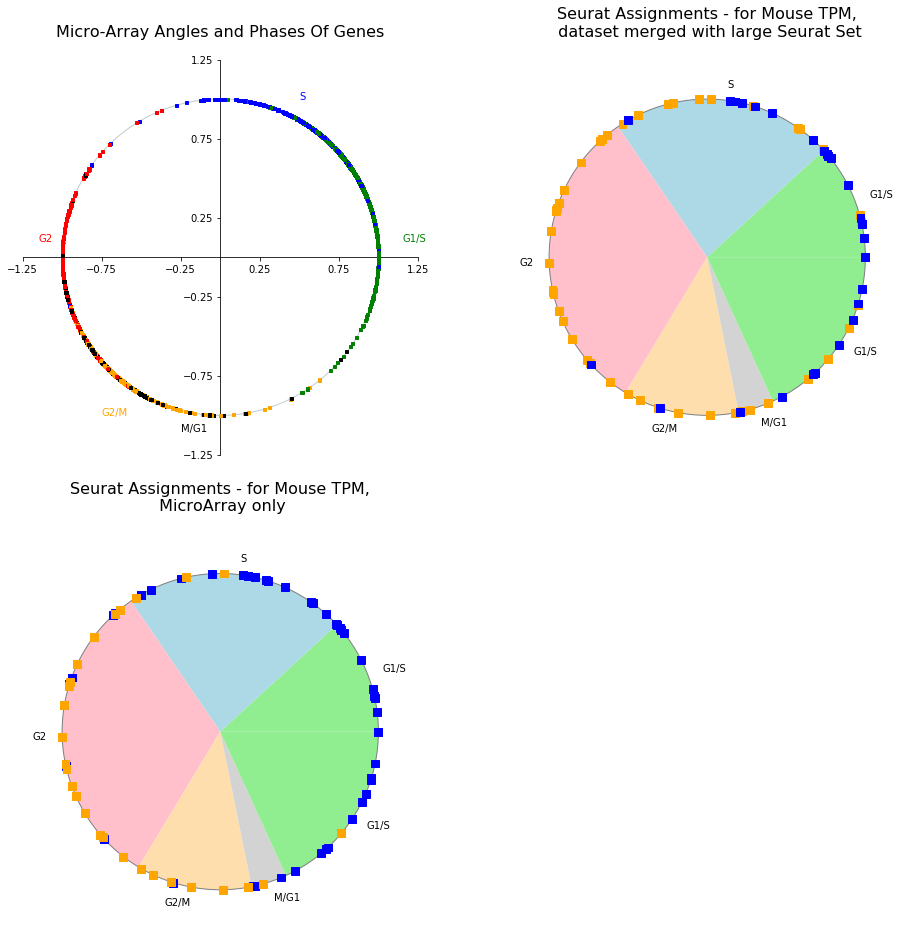

In [168]:
#print(whitfield_subset_micro_array_df)
#print(whitfield_subset_micro_array_df.sum(axis=0))
from pylab import *
figure(figsize=(16,16))


#### All Genes
ax=subplot(221, aspect='equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)
#circles(1, 0, 0.5, 'r', alpha=0.2, lw=5, edgecolor='b', transform=ax.transAxes)

#plot a set of circles (circles in diagonal)
#a=arange(11)
#out = circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')

# Create a Rectangle patches
for gene_name in gene_names_with_micro_array_data:
    use_color = 'gray'
    if (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G1/S'):
        use_color = 'green'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'S'):
        use_color = 'blue'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2'):
        use_color = 'red'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2/M'):
        use_color = 'orange'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'M/G1'):
        use_color = 'black'
    rect = Rectangle((gene_name_to_time_course_expressions_dict[gene_name]["cosine"]-0.01,gene_name_to_time_course_expressions_dict[gene_name]["sine"]-0.01),0.02,0.02,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=9)
    # Add the patch to the Axes
    ax.add_patch(rect)
    
text(1.15, 0.1, "G1/S", color='green')
text(0.5, 1, "S", color='blue')
text(-1.15, 0.1, "G2", color='red')
text(-0.75, -1, "G2/M", color='orange')
text(-0.25, -1.1, "M/G1", color='black')

title("Micro-Array Angles and Phases Of Genes\n", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(222, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,len(angles_list)):
    use_color = 'gray'
    if (nesterova_plus_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (nesterova_plus_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 9
    elif (nesterova_plus_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 8
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("Seurat Assignments - for Mouse TPM,\n dataset merged with large Seurat Set\n", fontsize=16)


##########
# Phase segmentation on the circle
ax=subplot(223, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,len(angles_list)):
    use_color = 'gray'
    if (mouse_only_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (mouse_only_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (mouse_only_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("Seurat Assignments - for Mouse TPM,\n MicroArray only\n", fontsize=16)


xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()

# Seurat Assignments - for Mouse TPM  Merged With Large Nesterova Set

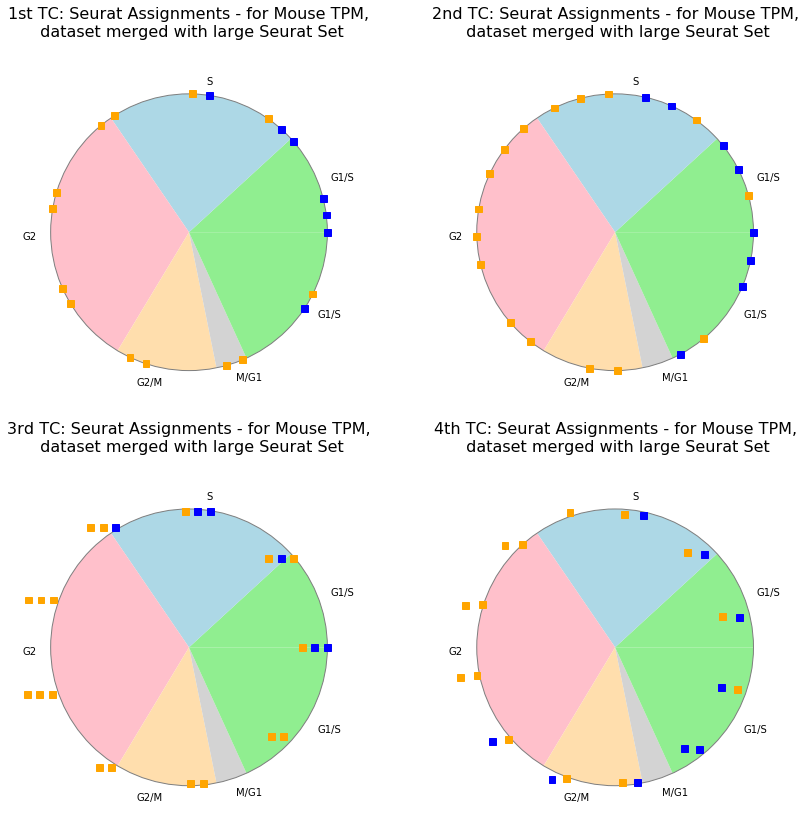

In [180]:
#print(whitfield_subset_micro_array_df)
#print(whitfield_subset_micro_array_df.sum(axis=0))
from pylab import *
figure(figsize=(14,14))



##########
# Phase segmentation on the circle
ax=subplot(221, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,20):
    use_color = 'gray'
    if (nesterova_plus_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (nesterova_plus_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 9
    elif (nesterova_plus_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 8
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("1st TC: Seurat Assignments - for Mouse TPM,\n dataset merged with large Seurat Set\n", fontsize=16)


##########
# Phase segmentation on the circle
ax=subplot(222, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(20,44):
    use_color = 'gray'
    if (nesterova_plus_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (nesterova_plus_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (nesterova_plus_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("2nd TC: Seurat Assignments - for Mouse TPM,\n dataset merged with large Seurat Set\n", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(223, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(44,68):
    use_color = 'gray'
    offset = (i-44) * 0.01
    if (nesterova_plus_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (nesterova_plus_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (nesterova_plus_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025-offset,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("3rd TC: Seurat Assignments - for Mouse TPM,\n dataset merged with large Seurat Set\n", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(224, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(68,91):
    use_color = 'gray'
    offset = (i-68) * 0.01
    if (nesterova_plus_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (nesterova_plus_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (nesterova_plus_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025-offset,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("4th TC: Seurat Assignments - for Mouse TPM,\n dataset merged with large Seurat Set\n", fontsize=16)


xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()

# Seurat Assignments - for Mouse TPM  MicroArray only

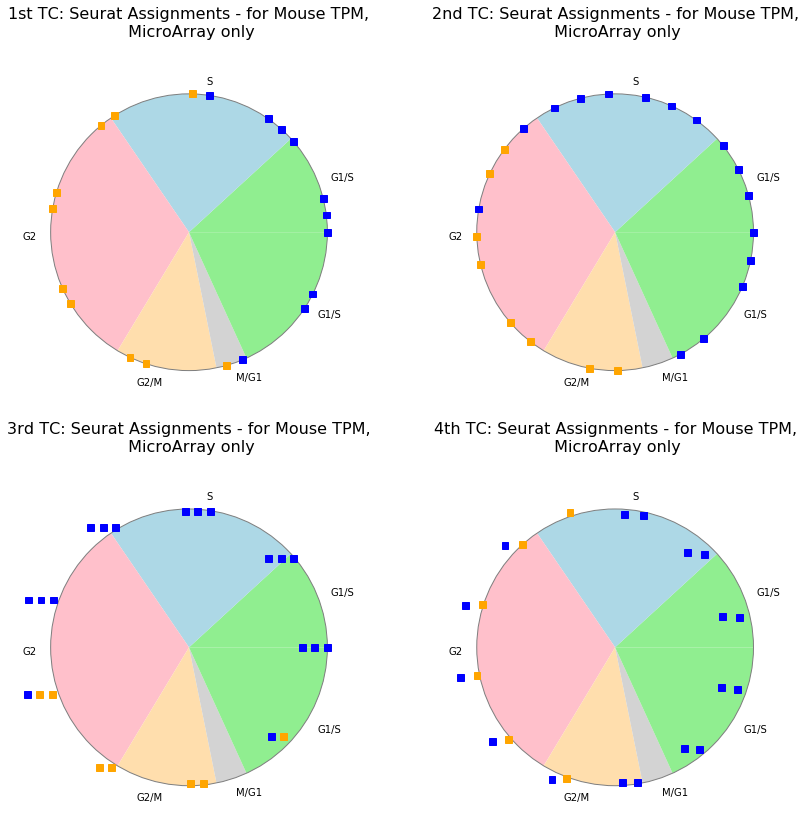

In [188]:
#print(whitfield_subset_micro_array_df)
#print(whitfield_subset_micro_array_df.sum(axis=0))
from pylab import *
figure(figsize=(14,14))



##########
# Phase segmentation on the circle
ax=subplot(221, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(0,20):
    use_color = 'gray'
    if (mouse_only_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (mouse_only_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 9
    elif (mouse_only_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 8
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("1st TC: Seurat Assignments - for Mouse TPM,\n MicroArray only\n", fontsize=16)


##########
# Phase segmentation on the circle
ax=subplot(222, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(20,44):
    use_color = 'gray'
    if (mouse_only_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (mouse_only_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (mouse_only_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("2nd TC: Seurat Assignments - for Mouse TPM,\n MicroArray only\n", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(223, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(44,68):
    use_color = 'gray'
    offset = (i-44) * 0.01
    if (mouse_only_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (mouse_only_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (mouse_only_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025-offset,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("3rd TC: Seurat Assignments - for Mouse TPM,\n MicroArray only\n", fontsize=16)

##########
# Phase segmentation on the circle
ax=subplot(224, aspect='equal')

labels = 'G1/S', 'S', 'G2', 'G2/M', 'M/G1', 'G1/S'
fracs = [13, 25, 35, 13, 4, 20]
colors = ["lightgreen", "lightblue", "pink", "navajowhite", "lightgrey", "lightgreen"]
plt.pie(fracs, labels=labels, colors = colors)

circle = Circle((0, 0), 1.0, color='grey', fill=False)
ax.add_artist(circle)

for i in range(68,91):
    use_color = 'gray'
    offset = (i-68) * 0.01
    if (mouse_only_micro_array_phase_list[i] == 'G1'):
        use_color = 'darkgreen'
        order = 5
    elif (mouse_only_micro_array_phase_list[i] == 'S'):
        use_color = 'blue'
        order = 8
    elif (mouse_only_micro_array_phase_list[i] == 'G2M'):
        use_color = 'orange'
        order = 9
    rect = Rectangle((math.cos(angles_list[i])-0.025-offset,math.sin(angles_list[i])-0.025),0.05,0.05,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=order)
    # Add the patch to the Axes
    ax.add_patch(rect)   

title("4th TC: Seurat Assignments - for Mouse TPM,\n MicroArray only\n", fontsize=16)


xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()

# Assess which human tissue TPM gives best Seurat assignment


In [198]:
import pandas as pd
tpm_df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct", sep='\t')
tissue_gene_name_to_tpm_dict = dict()
for index, row in tpm_df.iterrows():
    for t_id in range(2,55):
        tissue = tpm_df.columns[t_id].replace(" ", "")
        if tissue not in tissue_gene_name_to_tpm_dict:
            tissue_gene_name_to_tpm_dict[tissue] = dict()
        tissue_gene_name_to_tpm_dict[tissue][row["Description"]] = row[t_id]
        #print(tissue + " " + str(row[t_id]))

In [212]:
%%time
# Read in the micro-array data - so far only founds matches between 1230 genes in whitfield in the 56K genes from GTEX
# TODO - get better name mapping
import math
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
names_for_all_time_courses_list = list()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t4_" + str(i))

tissue_gene_name_to_time_course_expressions_dict = dict()

for tissue in tissue_gene_name_to_tpm_dict:  
    tissue_gene_name_to_time_course_expressions_dict[tissue] = dict()
    
    gene_names_with_micro_array_data = list()
    
    for index, row in whitfield_micro_array_df.iterrows():
        count +=1
        name = str(row['NAME'])
        if (name != 'nan'):
            #print("___" + name + "___")
            names = name.split("^")
            if (len(names) > 1):
                #print("___" + names[1] + "___")
                gene_name = names[1].strip()
                if (gene_name in tissue_gene_name_to_tpm_dict['WholeBlood'] and not(gene_name in gene_names_with_micro_array_data)):


                    ####!!!! cut-off to have just a few top cycling genes
                    scaled_fourier_score = float(row['Scaled Fourier'])
                    #if (scaled_fourier_score < 10.0):
                     #   continue
                    tpm = tissue_gene_name_to_tpm_dict[tissue][gene_name]
                    #print(gene_name + " is found")
                    gene_names_with_micro_array_data.append(gene_name)
                    count_found += 1
                    tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name] = dict()
                    tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["one"] = list()


                    new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                    new_row = new_row.fillna(0)
                    row[11:31] = new_row

                    new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                    new_row = new_row.fillna(0)
                    row[32:56] = new_row

                    new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                    new_row = new_row.fillna(0)
                    row[57:81] = new_row

                    new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                    new_row = new_row.fillna(0)
                    row[82:105] = new_row


                    #TODO: for now adding zero to missing time courses and samples - valid for all things?

                    for i in range(11,31):
                        tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["one"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                    tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["two"] = list()
                    for i in range(32,56):
                        tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["two"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                    tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["three"] = list()
                    for i in range(57,81):
                        tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["three"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                    tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["four"] = list()
                    for i in range(82,105):
                        tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["four"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data


CPU times: user 7min 33s, sys: 1.56 ms, total: 7min 33s
Wall time: 7min 32s


In [213]:
%%time
## make micro-array dataframe for seurat's input
import csv

for tissue in tissue_gene_name_to_tpm_dict:
    print(tissue)
    whitfield_subset_micro_array_df = pd.DataFrame(columns = names_for_all_time_courses_list)
    #print(names_for_all_time_courses_list)
    for gene_name in tissue_gene_name_to_time_course_expressions_dict[tissue]:
        count += 1
        all_time_course_names =  tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["one"] + tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["two"] + tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["three"] + tissue_gene_name_to_time_course_expressions_dict[tissue][gene_name]["four"] 
        #print(all_time_course_names)
        whitfield_subset_micro_array_df.loc[gene_name] = all_time_course_names
    whitfield_subset_micro_array_df.to_csv(tissue + "_" + "whitfield_micro_array_as_sc.csv", sep='\t', index=True)

Adipose-Subcutaneous
Adipose-Visceral(Omentum)
AdrenalGland
Artery-Aorta
Artery-Coronary
Artery-Tibial
Bladder
Brain-Amygdala
Brain-Anteriorcingulatecortex(BA24)
Brain-Caudate(basalganglia)
Brain-CerebellarHemisphere
Brain-Cerebellum
Brain-Cortex
Brain-FrontalCortex(BA9)
Brain-Hippocampus
Brain-Hypothalamus
Brain-Nucleusaccumbens(basalganglia)
Brain-Putamen(basalganglia)
Brain-Spinalcord(cervicalc-1)
Brain-Substantianigra
Breast-MammaryTissue
Cells-EBV-transformedlymphocytes
Cells-Transformedfibroblasts
Cervix-Ectocervix
Cervix-Endocervix
Colon-Sigmoid
Colon-Transverse
Esophagus-GastroesophagealJunction
Esophagus-Mucosa
Esophagus-Muscularis
FallopianTube
Heart-AtrialAppendage
Heart-LeftVentricle
Kidney-Cortex
Liver
Lung
MinorSalivaryGland
Muscle-Skeletal
Nerve-Tibial
Ovary
Pancreas
Pituitary
Prostate
Skin-NotSunExposed(Suprapubic)
Skin-SunExposed(Lowerleg)
SmallIntestine-TerminalIleum
Spleen
Stomach
Testis
Thyroid
Uterus
Vagina
WholeBlood
CPU times: user 2min 30s, sys: 90.2 ms, total: 

In [262]:
whitfield_timepoints_phases = list()
for i in range(0,len(names_for_all_time_courses_list)):
    phase = -1
    if angles_list[i] >= 0 and angles_list[i] <= 2:
        phase = "S"
    elif angles_list[i] > 2 and angles_list[i] <= 4.8:
        phase = "G2M"
    elif angles_list[i] > 4.8 and angles_list[i] <= 5.9:
        phase = "G1"
    elif angles_list[i] > 5.9:
        phase = "S"
    whitfield_timepoints_phases.append(phase)
    #print(names_for_all_time_courses_list[i] + " " + str(angles_list[i]) + " " + phase)

In [263]:

tissue_score_dict = dict()
tissue_data_line_dict = dict()
for tissue in tissue_gene_name_to_tpm_dict:
    #print(tissue)
    labels_file_name = "labels_" + tissue + "_whitfield_micro_array_as_sc.csv";    
    whitfield_seurat_df = pd.read_csv(labels_file_name, sep=',')
    whitfield_seurat_phase_list = list()
    for index, row in whitfield_seurat_df.iterrows():
        whitfield_seurat_phase_list.append(row["Phase"])
    S_tp = 0
    S_fp = 0
    S_fn = 0
    G2M_tp = 0
    G2M_fp = 0
    G2M_fn = 0
    G1_tp = 0
    G1_fp = 0
    G1_fn = 0
    for i in range(0,len(whitfield_seurat_phase_list)):
        #print(whitfield_timepoints_phases[i] + " " + whitfield_seurat_phase_list[i])
        if (whitfield_timepoints_phases[i] == "S"):
            if (whitfield_seurat_phase_list[i] == "S"):
                S_tp += 1
            else:
                S_fn += 1
                if (whitfield_seurat_phase_list[i] == "G2M"):
                    G2M_fp += 1
                elif (whitfield_seurat_phase_list[i] == "G1"):
                    G1_fp += 1
        elif (whitfield_timepoints_phases[i] == "G2M"):
            if (whitfield_seurat_phase_list[i] == "G2M"):
                G2M_tp += 1
            else:
                G2M_fn += 1
                if (whitfield_seurat_phase_list[i] == "S"):
                    S_fp += 1
                elif (whitfield_seurat_phase_list[i] == "G1"):
                    G1_fp += 1
        elif (whitfield_timepoints_phases[i] == "G1"):
            if (whitfield_seurat_phase_list[i] == "G1"):
                G1_tp += 1
            else:
                G1_fn += 1
                if (whitfield_seurat_phase_list[i] == "S"):
                    S_fp += 1
                elif (whitfield_seurat_phase_list[i] == "G2M"):
                    G2M_fp += 1 
    #print("S" + " " + str(S_tp) + " " + str(S_fn) + " " + str(S_fp))
    #print("G2M" + " " + str(G2M_tp) + " " + str(G2M_fn) + " " + str(G2M_fp))
    #print("G1" + " " + str(G1_tp) + " " + str(G1_fn) + " " + str(G1_fp))
    S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
    S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
    G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
    G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
    G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
    G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
    precision_avg = (S_precision + G2M_precision + G1_precision)/3
    recall_avg = (S_recall + G2M_recall + G1_recall)/3
    f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
    tissue_score_dict[tissue] = f1_score
    tissue_data_line_dict[tissue] = [tissue, np.round(float(precision_avg), 2), np.round(float(recall_avg), 2), np.round(float(f1_score), 2)]

    
    

In [264]:
import operator
data = []
sorted_x = sorted(tissue_score_dict.items(), key=operator.itemgetter(1), reverse=True)
for (tissue,value) in sorted_x:
    data.append(tissue_data_line_dict[tissue])

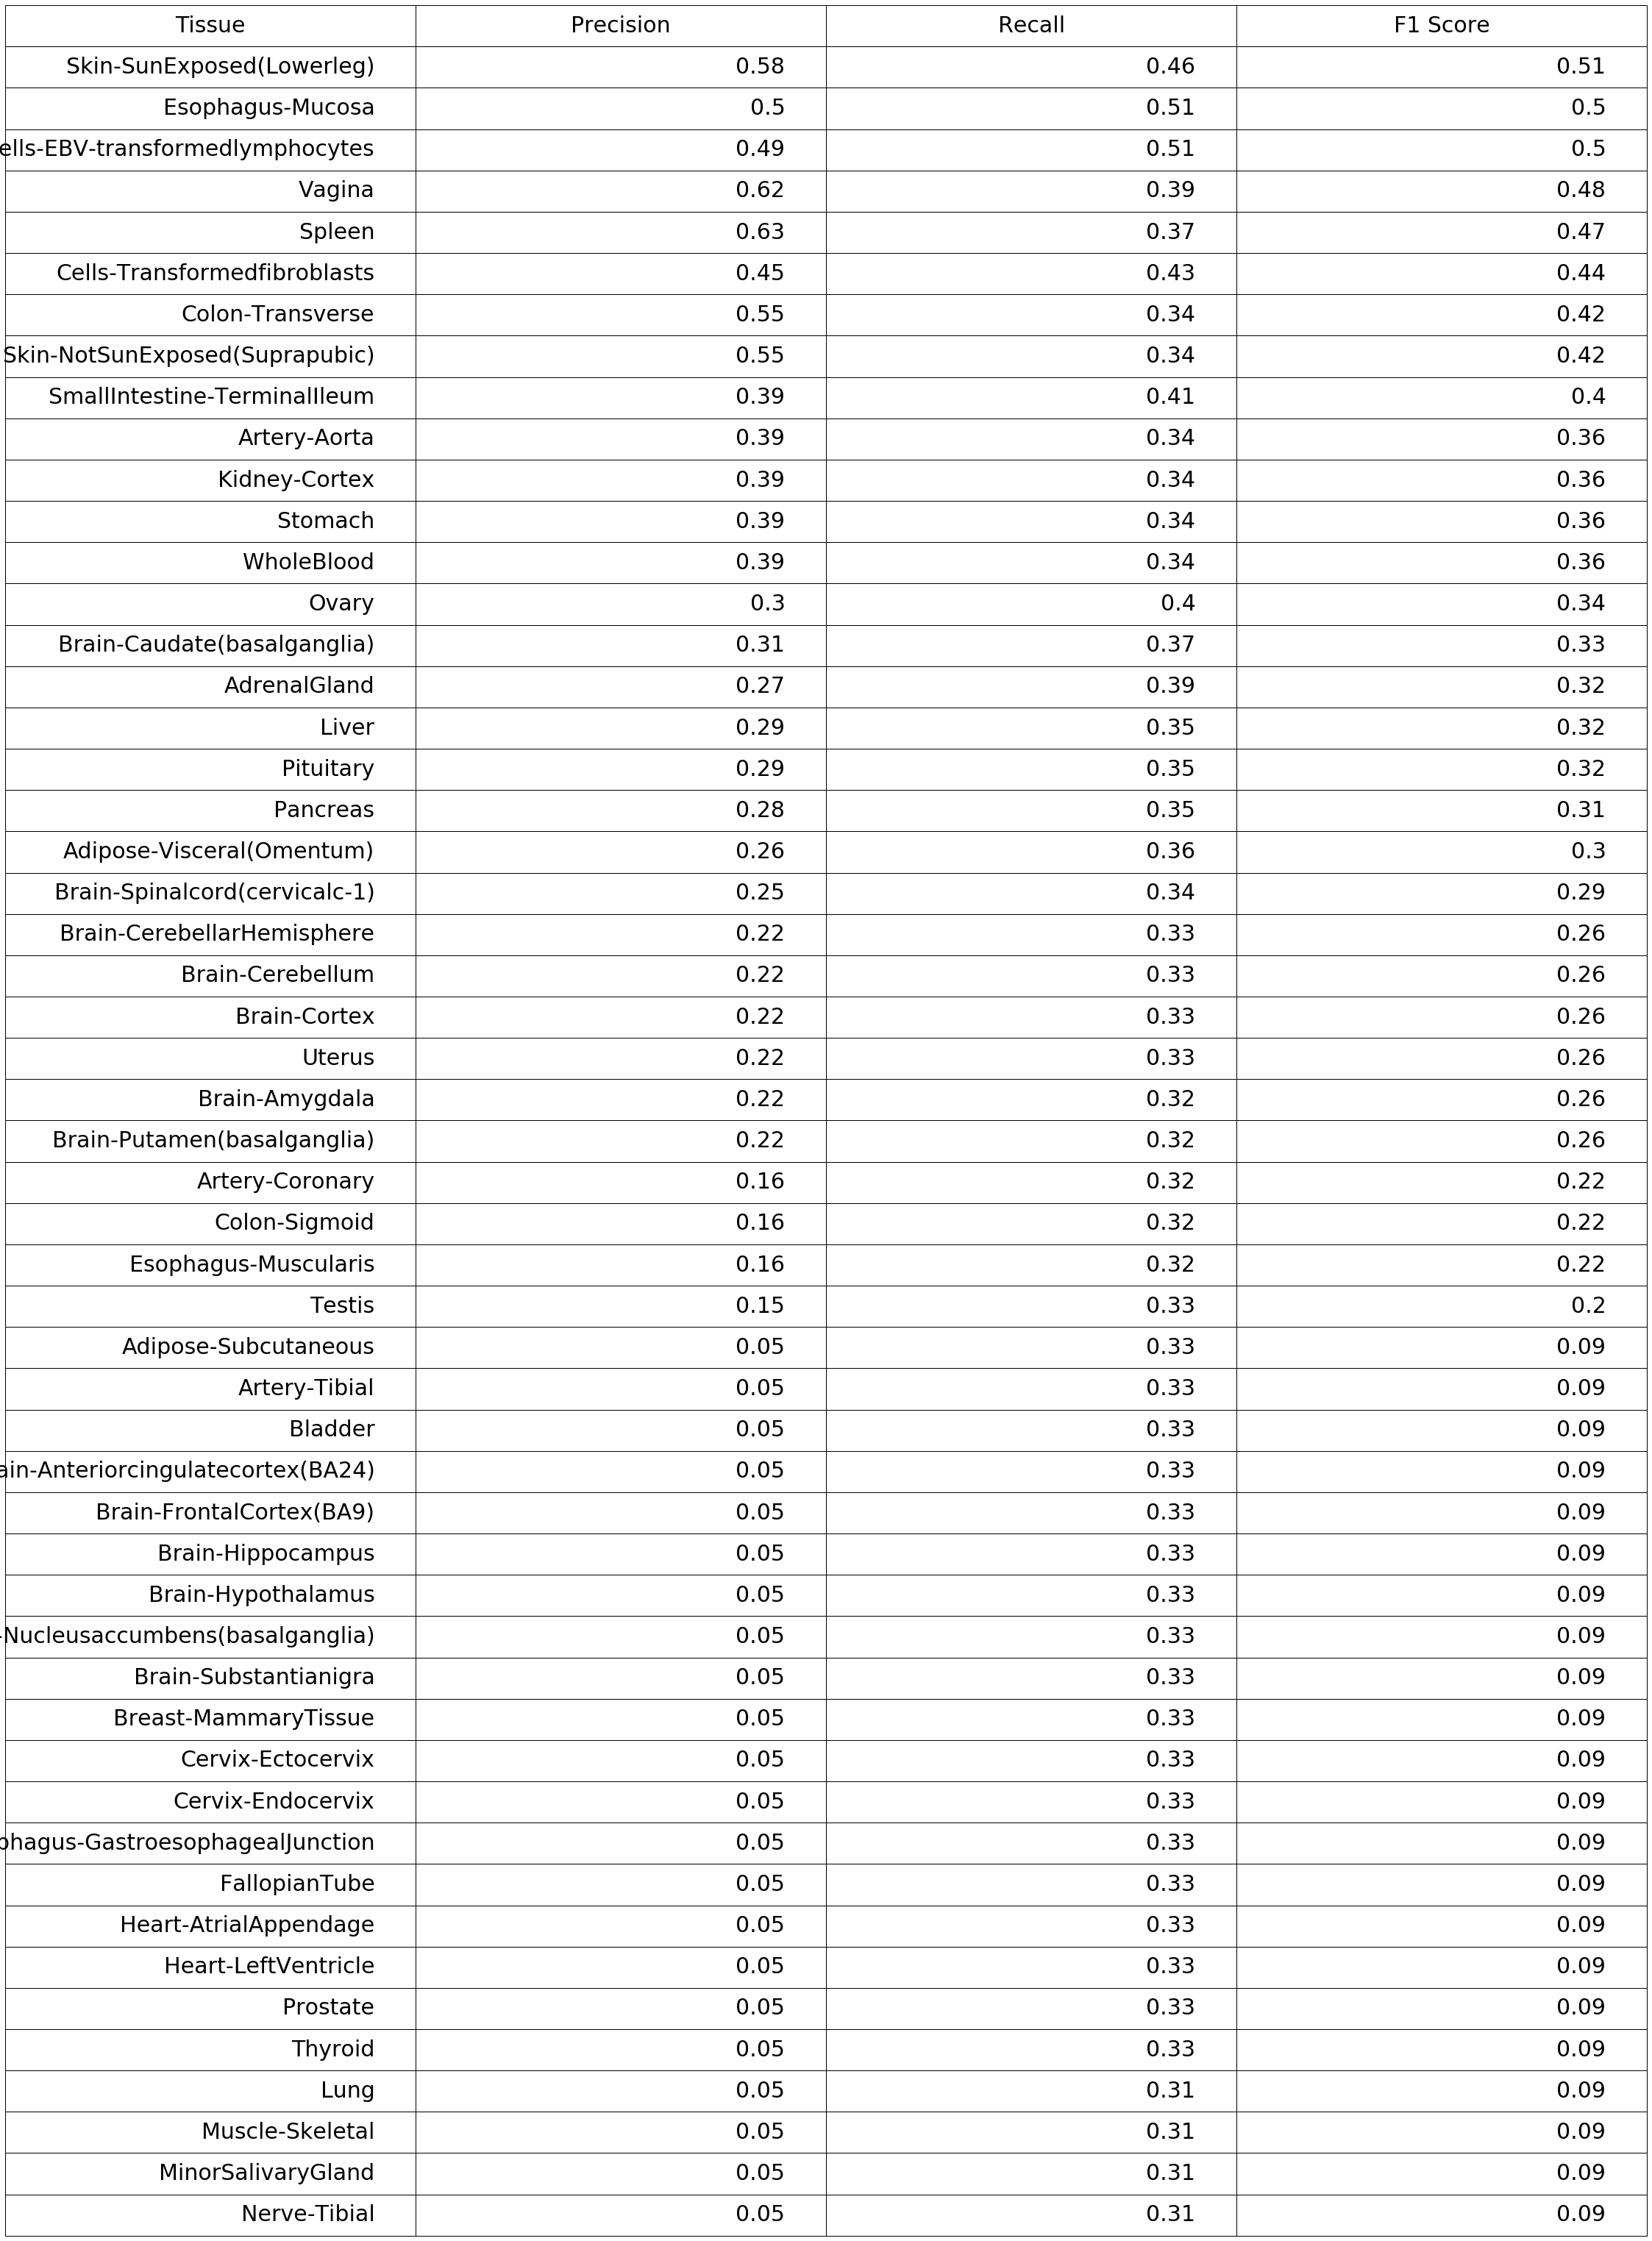

In [268]:
plt.figure(1, figsize=(20, 2))
plt.subplots_adjust(bottom = 0.1)
column_labels = ["Tissue", "Precision", "Recall", "F1 Score"]
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=data, colLabels=column_labels, loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(30)
the_table.scale(2, 2)
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.5)
plt.show()

# We figured out that Skin-SunExposed(Lowerleg) gives the best F1 score (0.51) with Seurat package, so we should use that for our TPM;  also, we saw above that F1 score for the Stahlberg small set is 0.58..  lets see if we can beat it

In [273]:
import pandas as pd
tpm_df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct", sep='\t')
gene_name_to_tpm_dict = dict()
for index, row in tpm_df.iterrows():
    gene_name_to_tpm_dict[row["Description"]] = row["Skin - Sun Exposed (Lower leg)"]

In [348]:
# Read in the micro-array data - so far only founds matches between 1230 genes in whitfield in the 56K genes from GTEX
# TODO - get better name mapping
import math
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

gene_names_with_micro_array_data = list()

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
names_for_all_time_courses_list = list()
gene_name_to_time_course_expressions_dict = dict()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t4_" + str(i))
    
for index, row in whitfield_micro_array_df.iterrows():
    count +=1
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            #print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (gene_name in gene_name_to_tpm_dict and not(gene_name in gene_names_with_micro_array_data)):
                
                
                ####!!!! cut-off to have just a few top cycling genes
                scaled_fourier_score = float(row['Scaled Fourier'])
                #if (scaled_fourier_score < 10.0):
                 #   continue
                    
                tpm = gene_name_to_tpm_dict[gene_name]
                #print(gene_name + " is found")
                gene_names_with_micro_array_data.append(gene_name)
                count_found += 1
                gene_name_to_time_course_expressions_dict[gene_name] = dict()
                gene_name_to_time_course_expressions_dict[gene_name]["one"] = list()
                
                
                new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[11:31] = new_row
            
                new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[32:56] = new_row
                
                new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[57:81] = new_row
                
                new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[82:105] = new_row
                
                
                #TODO: for now adding zero to missing time courses and samples - valid for all things?
                
                for i in range(11,31):
                    gene_name_to_time_course_expressions_dict[gene_name]["one"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["two"] = list()
                for i in range(32,56):
                    gene_name_to_time_course_expressions_dict[gene_name]["two"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["three"] = list()
                for i in range(57,81):
                    gene_name_to_time_course_expressions_dict[gene_name]["three"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["four"] = list()
                for i in range(82,105):
                    gene_name_to_time_course_expressions_dict[gene_name]["four"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
    
                gene_name_to_time_course_expressions_dict[gene_name]["sine"] = row['Sin']
                gene_name_to_time_course_expressions_dict[gene_name]["cosine"] = row['Cos']
                gene_name_to_time_course_expressions_dict[gene_name]["phase"] = row['Phase'].strip()
                gene_name_to_time_course_expressions_dict[gene_name]["fourier_score"] = scaled_fourier_score
print(count_found)
#print(gene_name_to_time_course_expressions_dict['KLF6'])

#print(gene_name_to_time_course_expressions_dict["PITPNC1"])

1230


In [353]:
# read in the single-cell data, and identify the set of genes that also have micro-array/tpm expression (1114)
# for each cell, get percentage of reads for each gene
# for the micro-array set, get percentage of "expression" for each gene
# for each gene, get the best match of percentages for each of the time-courses, and take an average angle
# then take the average angle of all the genes - that gives the phase
### process Stahlberg single cell data for Seurat input
stahlberg_MCF7_df = pd.read_csv("Stahlberg_MCF7_group_1_to_6.csv", sep=',')
def phase_to_string(phase_number):
    if (phase_number in (1, 4, 9)):
        return "G1"
    if (phase_number in (2, 5, 10)):
        return "S"
    if (phase_number in (3, 6, 11)):
        return "G2"
stahlberg_MCF7_df = stahlberg_MCF7_df.rename(lambda x: x + "_" + phase_to_string(int(stahlberg_MCF7_df.loc[x, "#Group"])))
stahlberg_MCF7_df = stahlberg_MCF7_df.iloc[:,:-3]
stahlberg_MCF7_df = stahlberg_MCF7_df.replace(-1,0.0).T
#print(stahlberg_MCF7_df)

In [495]:
## subset micro-array and single-cell data for intersecting genes
count = 0
whitfield_subset_micro_array_df = pd.DataFrame(columns = range(0,91))
cell_cycle_genes_for_analysis = list()
for index, row in stahlberg_MCF7_df.iterrows():
    if index in gene_names_with_micro_array_data:
        count += 1
        gene_name = index
        cell_cycle_genes_for_analysis.append(gene_name)
        whitfield_subset_micro_array_df.loc[gene_name] = gene_name_to_time_course_expressions_dict[gene_name]["one"] + gene_name_to_time_course_expressions_dict[gene_name]["two"] + gene_name_to_time_course_expressions_dict[gene_name]["three"] + gene_name_to_time_course_expressions_dict[gene_name]["four"]
stahlberg_MCF7_subset_df = pd.DataFrame(stahlberg_MCF7_df.loc[cell_cycle_genes_for_analysis])
print(count)

30


In [496]:
# express each column as a percentage
whitfield_subset_micro_array_df = whitfield_subset_micro_array_df.div(whitfield_subset_micro_array_df.sum(axis=0))
stahlberg_MCF7_subset_df = stahlberg_MCF7_subset_df.div(stahlberg_MCF7_subset_df.sum(axis=0))

def quantileNormalize(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic[col] = df[col].sort_values(na_position='first').values
    sorted_df = pd.DataFrame(dic)
    #rank = sorted_df.mean(axis = 1).tolist()
    rank = sorted_df.median(axis = 1).tolist()
    #sort
    for col in df:
        # compute percentile rank [0,1] for each score in column 
        t = df[col].rank( pct=True, method='max' ).values
        # replace percentile values in column with quantile normalized score
        # retrieve q_norm score using calling rank with percentile value
        df[col] = [ np.nanpercentile( rank, i*100 ) if ~np.isnan(i) else np.nan for i in t ]
    return df

#whitfield_subset_micro_array_df = quantileNormalize(whitfield_subset_micro_array_df)
#stahlberg_MCF7_subset_df =  quantileNormalize(stahlberg_MCF7_subset_df)

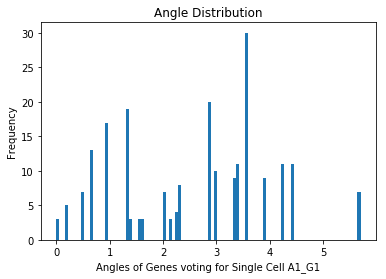

2.6400180030076412
G2M


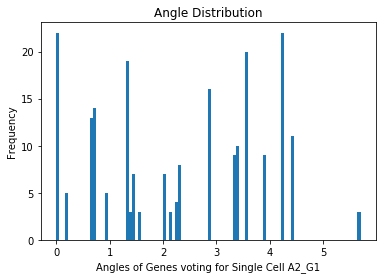

2.34427887934256
G2M


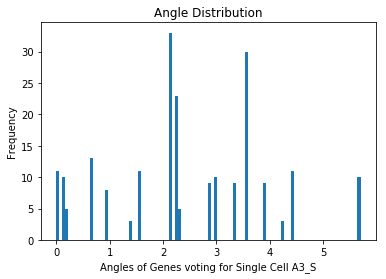

2.419841901756824
G2M


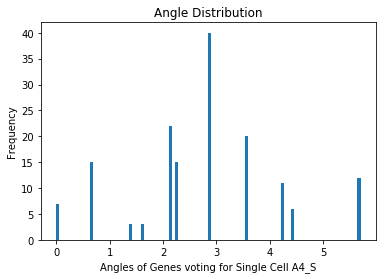

2.693321218445229
G2M


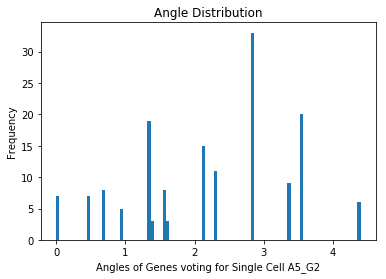

2.258254930273738
G2M


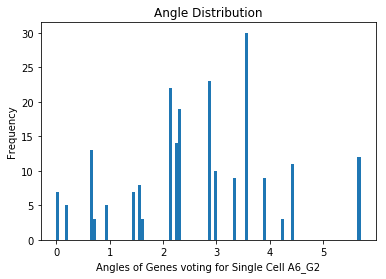

2.5966668623365297
G2M


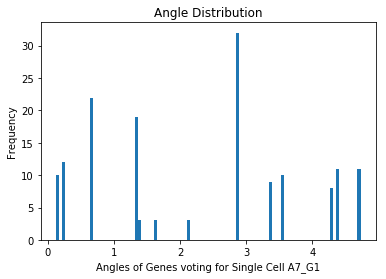

2.1762920813651987
G2M


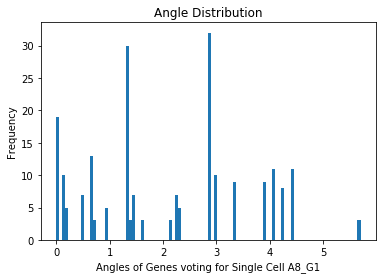

1.836309068137965
S


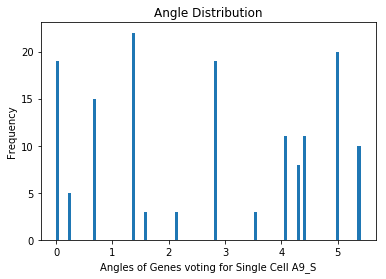

5.650494223807174
G1


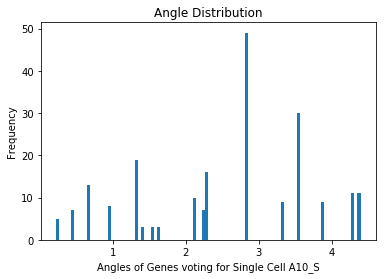

2.6599426437806315
G2M


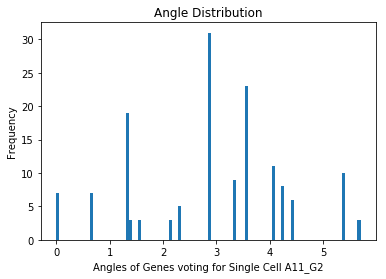

3.1035884395583837
G2M


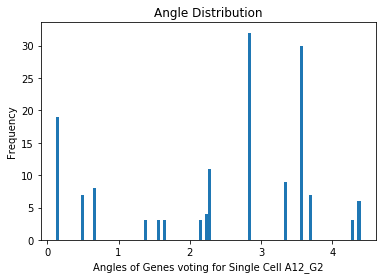

2.8534142398542097
G2M


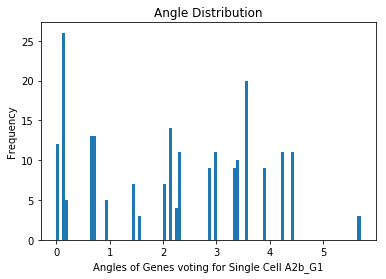

2.2380053121813406
G2M


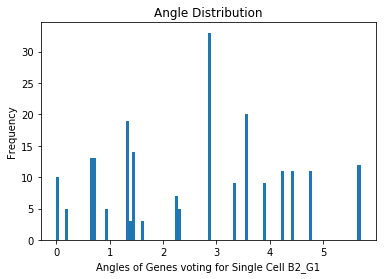

2.394567061190072
G2M


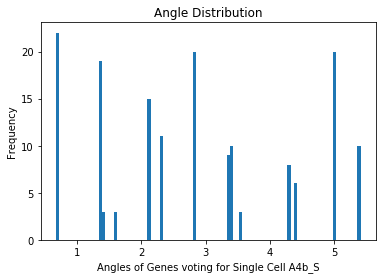

2.5247917163238998
G2M


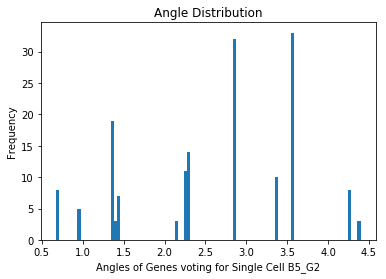

2.6435286088039023
G2M


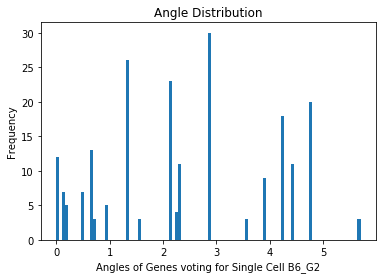

2.0784978319514322
G2M


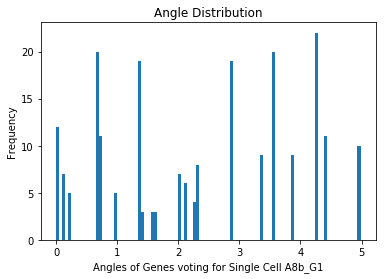

2.307915909170507
G2M


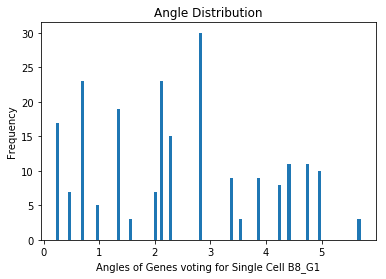

2.1047716942424968
G2M


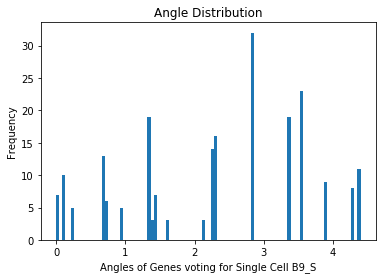

2.474855619638426
G2M


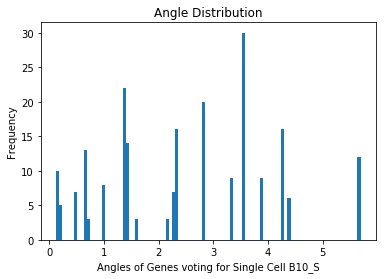

2.26750813537141
G2M


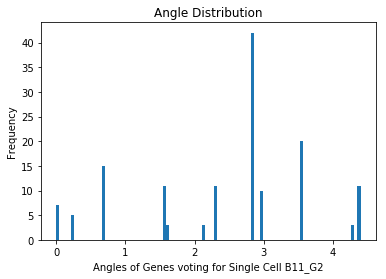

2.696824365804306
G2M


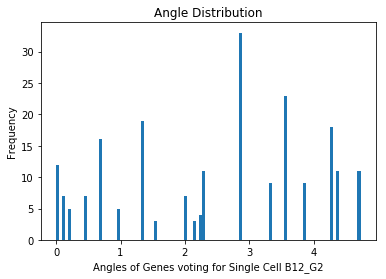

2.8011157405161384
G2M


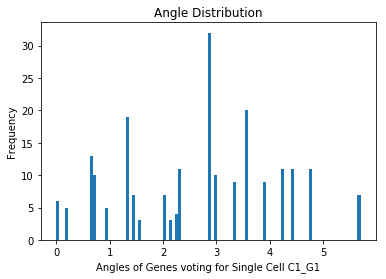

2.6631935829545714
G2M


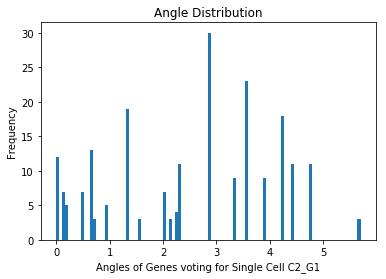

2.815650324932853
G2M


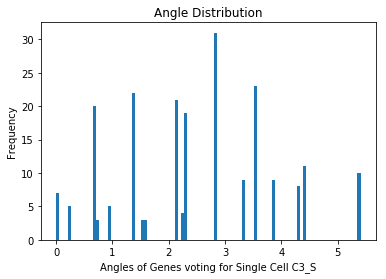

2.4264702479343527
G2M


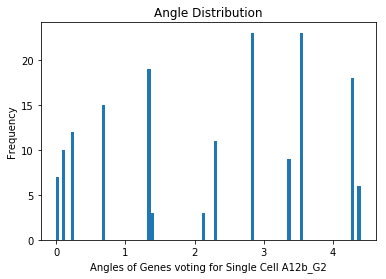

2.491987439688548
G2M


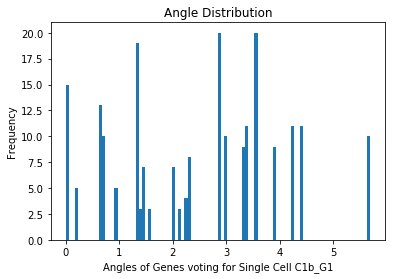

2.4601736693282965
G2M


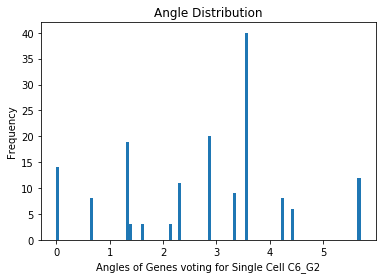

2.9543906321556945
G2M


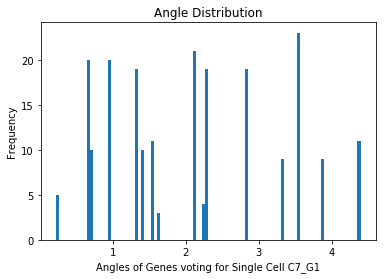

1.9752457645525134
S


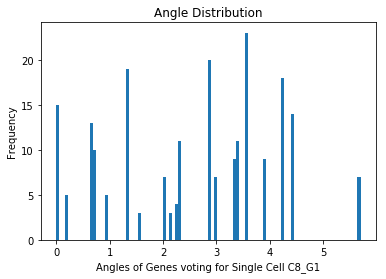

2.842037116717093
G2M


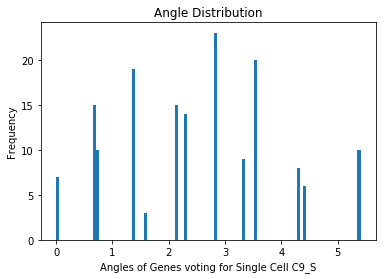

2.334792033452646
G2M


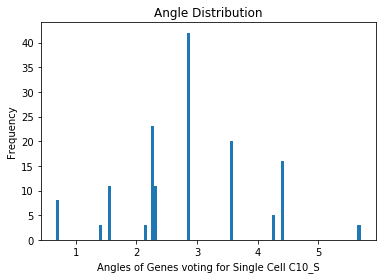

2.780539744268253
G2M


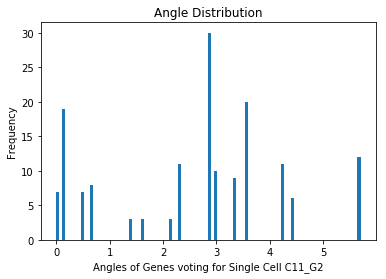

2.979042700091214
G2M


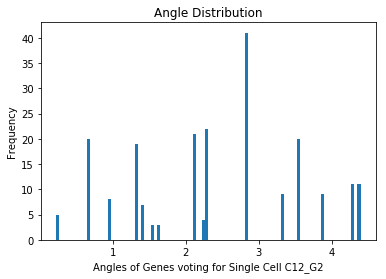

2.4607708518189004
G2M


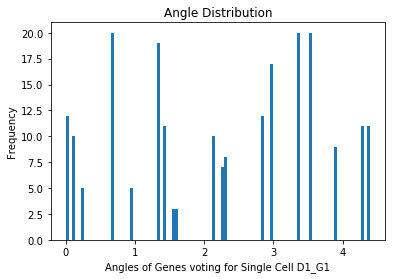

2.3962639697115358
G2M


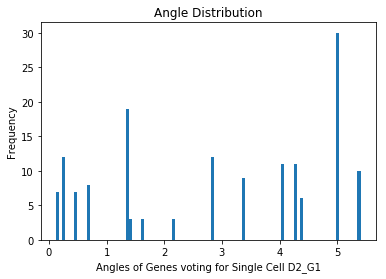

5.342672180649453
G1


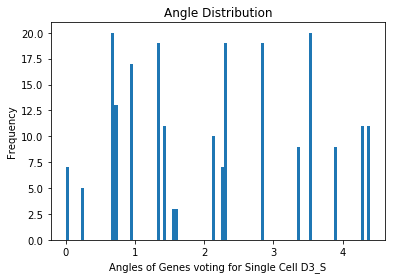

1.9808878749716756
S


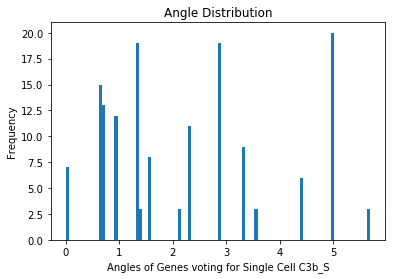

1.399180379112534
S


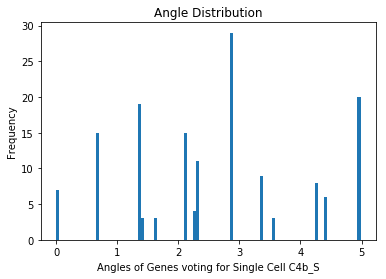

2.4019559494741105
G2M


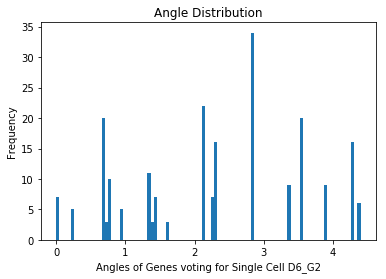

2.3433203961217126
G2M


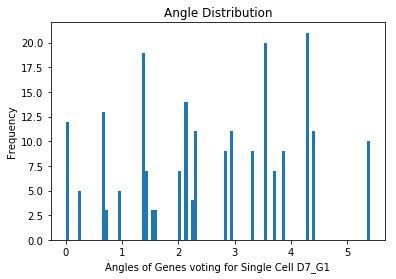

2.6837285213977817
G2M


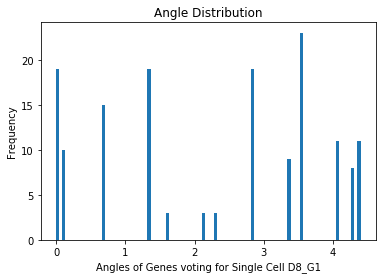

2.910214886753664
G2M


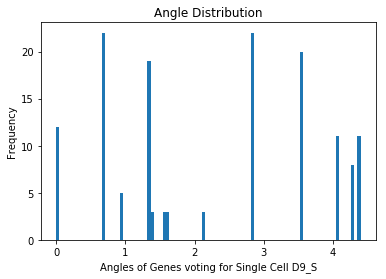

2.307326311629107
G2M


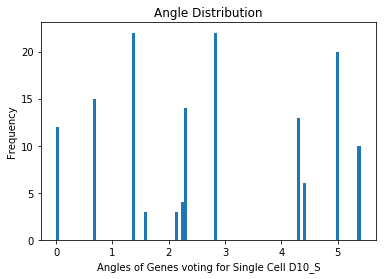

1.7364931887502413
S


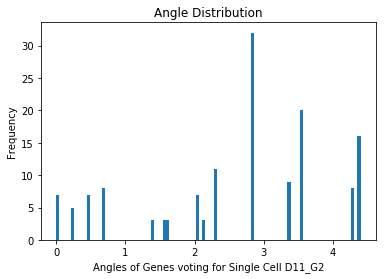

2.917980290086102
G2M


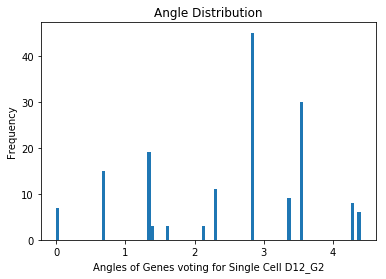

2.7303333652825375
G2M


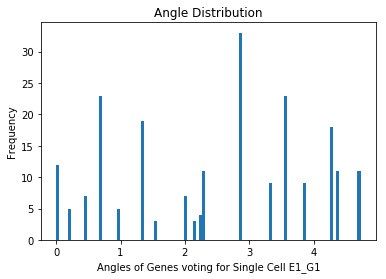

2.7441190715085244
G2M


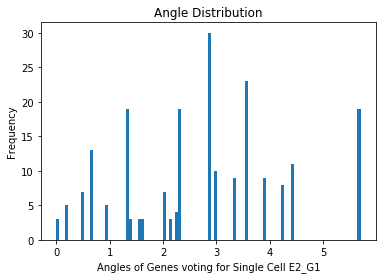

2.5686249746542953
G2M


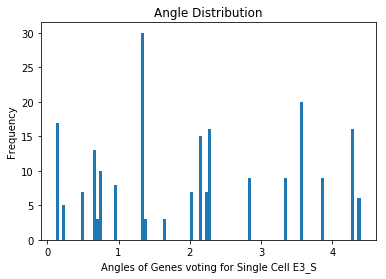

1.8319310177987806
S


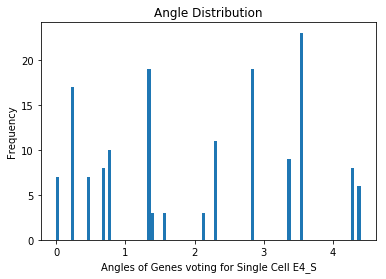

1.9497464371884925
S


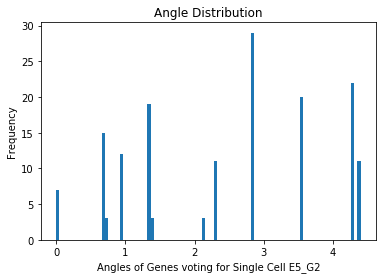

2.5571068734508735
G2M


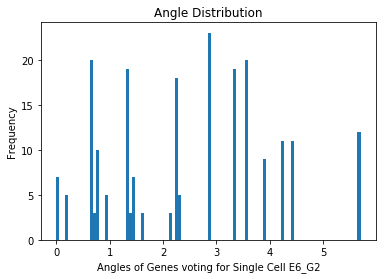

2.2890574976241984
G2M


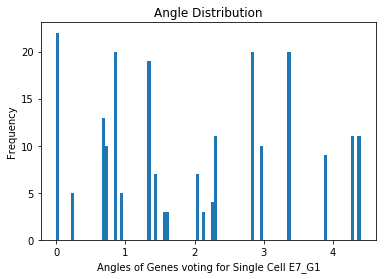

1.7582988940528699
S


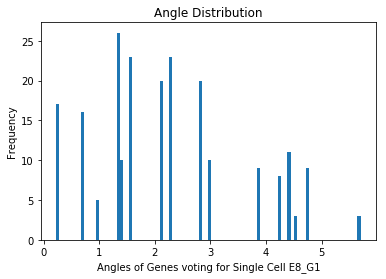

1.8874292904887646
S


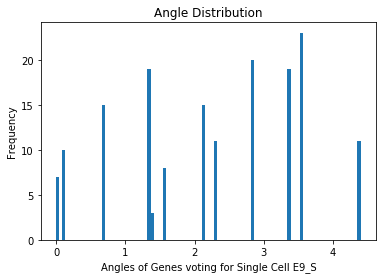

2.37026687747036
G2M


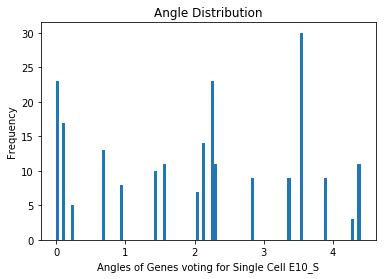

2.0567338037244767
G2M


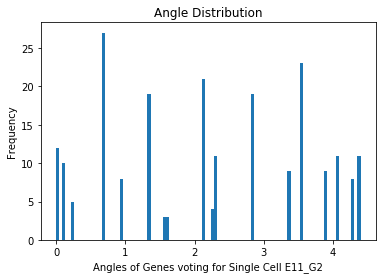

2.2436550440682814
G2M


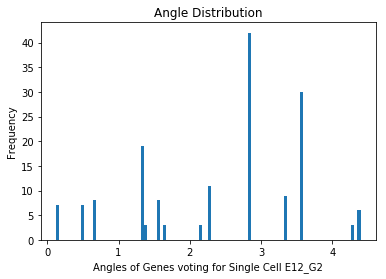

2.5637733411849735
G2M


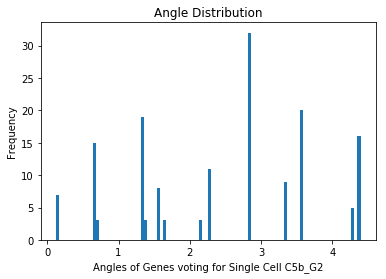

2.513097178946131
G2M


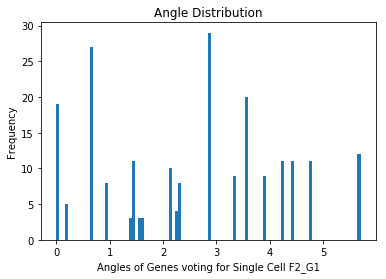

2.486284560953371
G2M


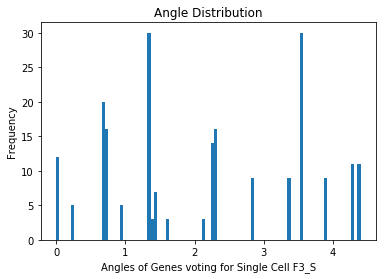

1.9856019527447488
S


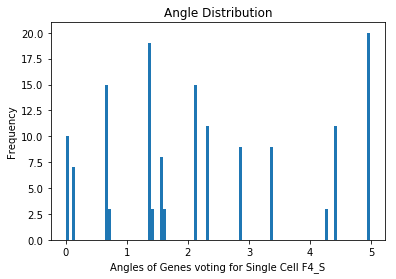

1.4681751220961485
S


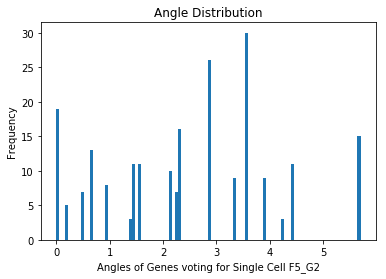

2.3225002636694665
G2M


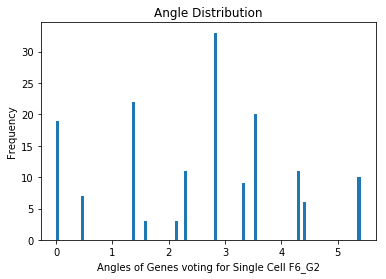

2.774118118030425
G2M


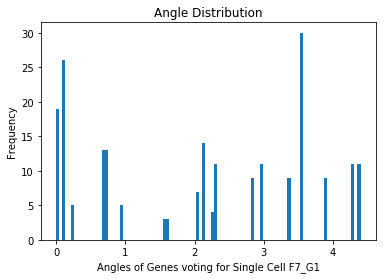

2.218250443457682
G2M


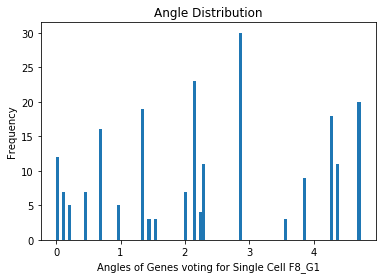

2.167903830635971
G2M


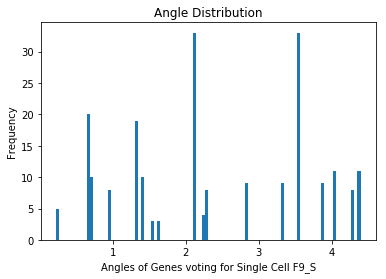

2.3760622095963213
G2M


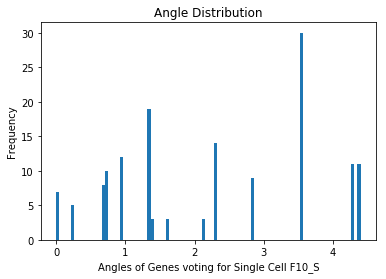

2.1116537581027766
G2M


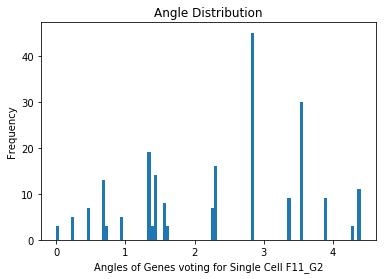

2.414664193320128
G2M


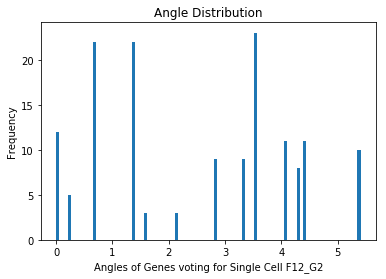

3.2297440285730556
G2M


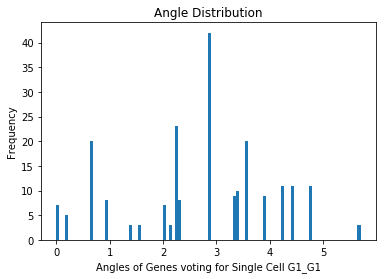

2.906596837799576
G2M


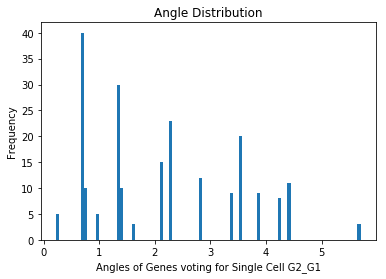

1.8089457828652606
S


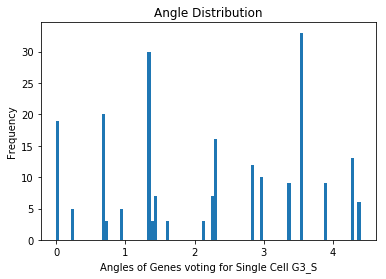

2.2465845831432207
G2M


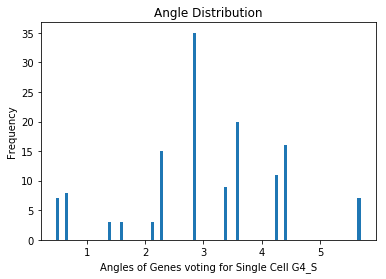

3.156207975835453
G2M


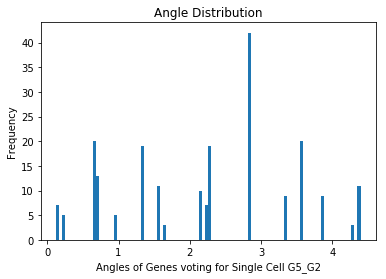

2.2478722053819764
G2M


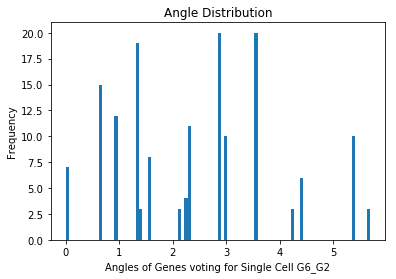

2.0443909938634004
G2M


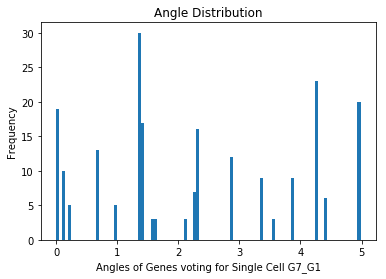

1.483875523502687
S


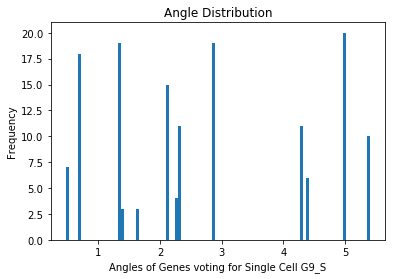

1.805582915331605
S


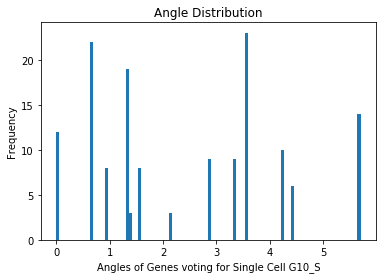

1.3817369761574558
S


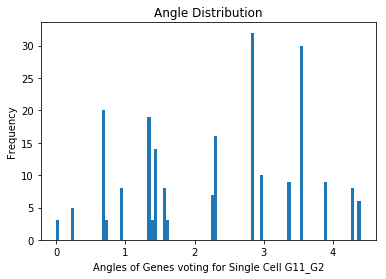

2.37881733939394
G2M


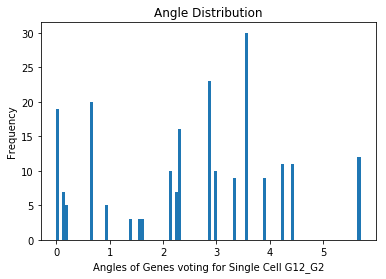

2.819750193332982
G2M


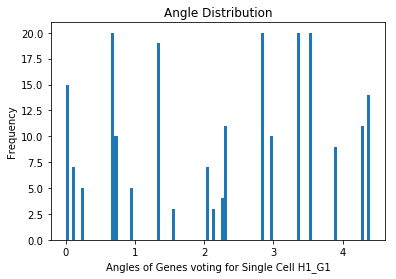

2.4605070065806727
G2M


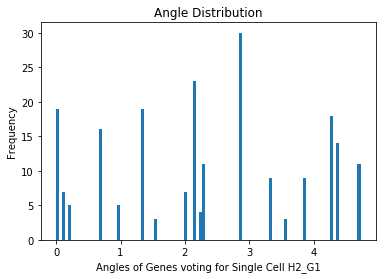

2.3568251891398795
G2M


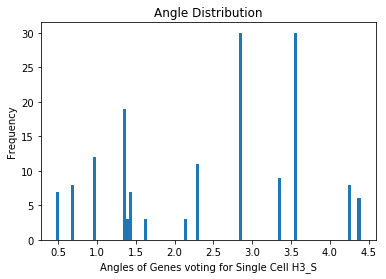

2.4842572962376854
G2M


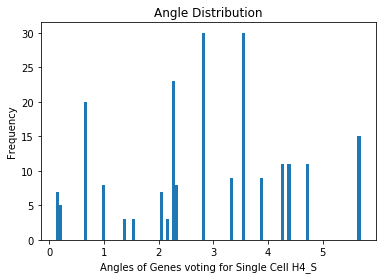

2.999622997970214
G2M


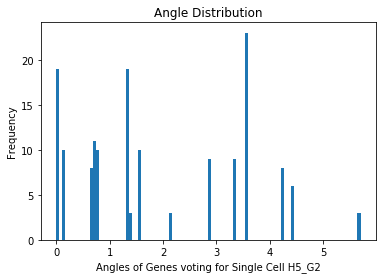

1.1788549998308464
S


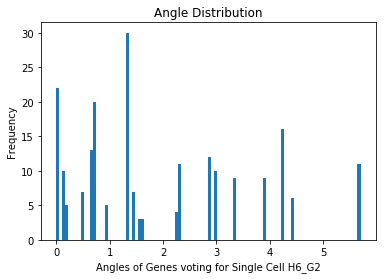

1.0412211570670162
S


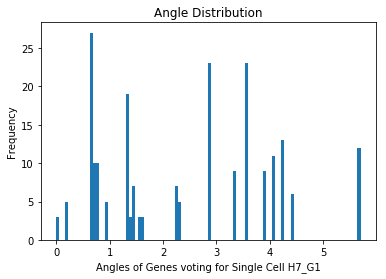

2.0426439684999105
G2M


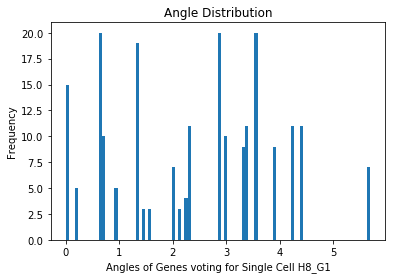

2.441462387375234
G2M


In [491]:
stahlberg_our_assignment_tupples_list = list()
for cell_name in stahlberg_MCF7_subset_df:    
    all_genes_angle_list = list()
    all_genes_sine_sum = 0
    all_genes_cosine_sum = 0
    count = 0
    for gene_name in cell_cycle_genes_for_analysis:
        expression_scRNA = stahlberg_MCF7_subset_df[cell_name][gene_name]
        if (not expression_scRNA): # no reads in single cell, do not consider
            #print("nothing for gene " + gene_name)
            continue

        #if (gene_name == 'PITPNC1'):
         #   print(whitfield_subset_micro_array_df.loc[gene_name])

        # process the first time course
        best_diff_1 = math.inf
        best_angle_1 = -1
        for i in range(0, 20):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+0] - expression_scRNA)
            if (diff < best_diff_1 and (whitfield_subset_micro_array_df.loc[gene_name][i+0] != 0)):
                best_diff_1 = diff
                best_angle_1 = time_course_1_angles_list[i]


        #print(whitfield_subset_micro_array_df.loc[gene_name])
        #print(best_diff_1)
        #print(best_angle_1)
        # process the second time course
        best_diff_2 = math.inf
        best_angle_2 = -1
        for i in range(0, 24):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+20] - expression_scRNA)
            if (diff < best_diff_2 and (whitfield_subset_micro_array_df.loc[gene_name][i+20] != 0)):
                best_diff_2 = diff
                best_angle_2 = time_course_2_angles_list[i]



        #print(whitfield_subset_micro_array_df.loc[gene_name][20:44])
        #print(best_diff_2)
        #print(best_angle_2)
        # process the third time course
        best_diff_3 = math.inf
        best_angle_3 = -1
        for i in range(0, 24):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+44] - expression_scRNA)
            if (diff < best_diff_3):
                best_diff_3 = diff
                best_angle_3 = time_course_3_angles_list[i]
        #print(whitfield_subset_micro_array_df.loc[gene_name][44:68])
        #print(best_diff_3)
        #print(best_angle_3)
        # process the first time course
        best_diff_4 = math.inf
        best_angle_4 = -1
        for i in range(0, 23):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+68] - expression_scRNA)
            if (diff < best_diff_4):
                best_diff_4 = diff
                best_angle_4 = time_course_4_angles_list[i]
        #print(whitfield_subset_micro_array_df.loc[gene_name][68:91])
        #print(best_diff_4)
        #print(best_angle_4)

        #print(gene_name)
        count += 1
        #print(expression_scRNA)

        sin_sum = 0
        cos_sum = 0
        if (best_angle_1 != -1):
            sin_sum += math.sin(best_angle_1)
            cos_sum += math.cos(best_angle_1)
        if (best_angle_2 != -1):
            sin_sum += math.sin(best_angle_2)
            cos_sum += math.cos(best_angle_2)
        if (best_angle_3 != -1):
            sin_sum += math.sin(best_angle_3)
            cos_sum += math.cos(best_angle_3)
        if (best_angle_4 != -1):
            sin_sum += math.sin(best_angle_4)
            cos_sum += math.cos(best_angle_4)

        average_gene_angle = math.atan2(sin_sum, cos_sum)
        if (average_gene_angle < 0):
            average_gene_angle += 2*math.pi
        #TRY - just the first time course
        
        
        # HERE, try to use the best of the 4 angles
        if (best_diff_1 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_1
        elif (best_diff_2 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_2
        elif (best_diff_3 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_3
        elif (best_diff_4 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_4
        
        #average_gene_angle = best_angle_1

        repeat = round(gene_name_to_time_course_expressions_dict[gene_name]["fourier_score"])
        #if (repeat == 20):
         #   print(gene_name)
        #  print(str(best_angle_1) + " " + str(best_angle_2) + " " + str(best_angle_3) + " " + str(best_angle_4))
        #print(repeat)
        #print(average_gene_angle)
        
        for i in range(0,repeat):
            all_genes_sine_sum += math.sin(average_gene_angle)
            all_genes_cosine_sum += math.cos(average_gene_angle)
            all_genes_angle_list.append(average_gene_angle)
        
        #print(average_gene_angle)
        #if (count >3):
        #    break
    import matplotlib.pyplot as plt
    plt.hist(all_genes_angle_list, bins=100)
    plt.xlabel('Angles of Genes voting for Single Cell ' + cell_name)
    plt.ylabel('Frequency')
    plt.title('Angle Distribution')
    plt.show()
    average_angle_across_all_genes = math.atan2(all_genes_sine_sum, all_genes_cosine_sum)
    #print(average_angle_across_all_genes)
    if (average_angle_across_all_genes < 0):
        average_angle_across_all_genes += 2*math.pi
    print(average_angle_across_all_genes)
    predicted_phase = -1
    if average_angle_across_all_genes >= 0 and average_angle_across_all_genes <= 2:
        predicted_phase = "S"
    elif average_angle_across_all_genes > 2 and average_angle_across_all_genes <= 4.8:
        predicted_phase = "G2M"
    elif average_angle_across_all_genes > 4.8 and average_angle_across_all_genes <= 5.9:
        predicted_phase = "G1"
    elif angles_list[i] > 5.9:
        predicted_phase = "S"
    print(predicted_phase)
    stahlberg_our_assignment_tupples_list.append((cell_name, predicted_phase))

In [497]:
for cell_name in stahlberg_MCF7_subset_df:    
    all_genes_angle_list = list()
    all_genes_sine_sum = 0
    all_genes_cosine_sum = 0
    count = 0
    print(cell_name)
    count_scRNA_outside_whitfield_range = 0
    count_high_fourier_score_genes = 0
    count_zero_genes = 0
    for gene_name in cell_cycle_genes_for_analysis:
        expression_scRNA = stahlberg_MCF7_subset_df[cell_name][gene_name]
        if (not expression_scRNA):
            count_zero_genes += 1
    print(count_zero_genes)

A1_G1
20
A2_G1
18
A3_S
14
A4_S
7
A5_G2
8
A6_G2
12
A7_G1
11
A8_G1
12
A9_S
11
A10_S
13
A11_G2
11
A12_G2
11
A2b_G1
16
B2_G1
12
A4b_S
11
B5_G2
7
B6_G2
23
A8b_G1
18
B8_G1
21
B9_S
12
B10_S
12
B11_G2
11
B12_G2
21
C1_G1
19
C2_G1
22
C3_S
14
A12b_G2
10
C1b_G1
20
C6_G2
9
C7_G1
14
C8_G1
20
C9_S
10
C10_S
9
C11_G2
11
C12_G2
14
D1_G1
13
D2_G1
10
D3_S
13
C3b_S
10
C4b_S
10
D6_G2
12
D7_G1
17
D8_G1
11
D9_S
9
D10_S
9
D11_G2
11
D12_G2
8
E1_G1
21
E2_G1
20
E3_S
12
E4_S
11
E5_G2
9
E6_G2
12
E7_G1
19
E8_G1
24
E9_S
8
E10_S
15
E11_G2
14
E12_G2
9
C5b_G2
11
F2_G1
13
F3_S
12
F4_S
9
F5_G2
13
F6_G2
10
F7_G1
16
F8_G1
21
F9_S
14
F10_S
10
F11_G2
12
F12_G2
10
G1_G1
15
G2_G1
12
G3_S
12
G4_S
10
G5_G2
13
G6_G2
7
G7_G1
12
G9_S
9
G10_S
9
G11_G2
12
G12_G2
13
H1_G1
19
H2_G1
22
H3_S
10
H4_S
15
H5_G2
11
H6_G2
12
H7_G1
12
H8_G1
19


In [498]:
print(stahlberg_MCF7_subset_df)

            A1_G1     A2_G1      A3_S      A4_S     A5_G2     A6_G2     A7_G1  \
ANK3     0.000000  0.068200  0.059099  0.033273  0.040385  0.035073  0.037022   
ATF3     0.000000  0.070840  0.067622  0.000000  0.029950  0.000000  0.019851   
CCNA2    0.079144  0.000000  0.000000  0.045816  0.048916  0.063612  0.034950   
CCNB1    0.165659  0.141266  0.108908  0.077164  0.076661  0.103710  0.067638   
CCNB2    0.103788  0.000000  0.073435  0.067825  0.061271  0.095789  0.057807   
CCND3    0.000000  0.000000  0.000000  0.018474  0.024167  0.014846  0.000000   
CCNE1    0.000000  0.000000  0.028185  0.032806  0.018986  0.030550  0.037355   
CCNE2    0.000000  0.000000  0.000000  0.031739  0.046930  0.000000  0.074973   
CDCA3    0.000000  0.000000  0.000000  0.045246  0.053439  0.057526  0.000000   
CDC25A   0.000000  0.000000  0.000000  0.030527  0.000000  0.021232  0.031243   
CDKN1A   0.187866  0.135393  0.114160  0.057933  0.075173  0.064389  0.047580   
CDT1     0.000000  0.000000 

In [364]:
S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0    
 
for (cell_name, predicted_phase) in stahlberg_our_assignment_tupples_list:
    if ("_S" in cell_name):
        if (predicted_phase == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (predicted_phase == "G2M"):
                G2M_fp += 1
            elif (predicted_phase == "G1"):
                G1_fp += 1
    elif ("_G2" in cell_name):        
        if (predicted_phase == "G2M"):
            G2M_tp += 1        
        else:
            G2M_fn += 1
            if (predicted_phase == "S"):
                S_fp += 1
            elif (predicted_phase == "G1"):
                G1_fp += 1
    elif ("_G1" in cell_name):
        if (predicted_phase == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (predicted_phase == "S"):
                S_fp += 1
            elif (predicted_phase == "G2M"):
                G2M_fp += 1 

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

F1_score
0.4486030131338635


# Running Experiments try to Classify Stahlberg
## all intersecting genes voting:  genes = 30,  F1 = 0.38
## intersecting genes with score > 10 voting: genes = 5, F1 = 0.39
## intersecting genes with score > 8 voting: genes = 11, F1 = 0.35
## all intersecting genes, scale # by fourier score: genes = 30, F1 = 0.32
## all intersect genes, best of all time courses, no scale: genes = 30, F1 = 0.43
## all intersect genes, best of all time courses, scale by fourier: genes = 30, F1 = 0.39

# found that percentile does not work - different percentages for genes, picking highest or lowest time point as best match

# trying with quantile normalization
## all intersecting genes, scale # by fourier score: genes = 30, F1 = 0.23
## all intersect genes, best of all time courses, scale # by fourier score: genes = 30, F1 = 0.45
## all intersect genes, best of all time courses, no scale: genes = 30, F1 = 0.36
## all int genes with score > 10 voting, best of all time courses, no scale: genes = 5, F1 = 0.21

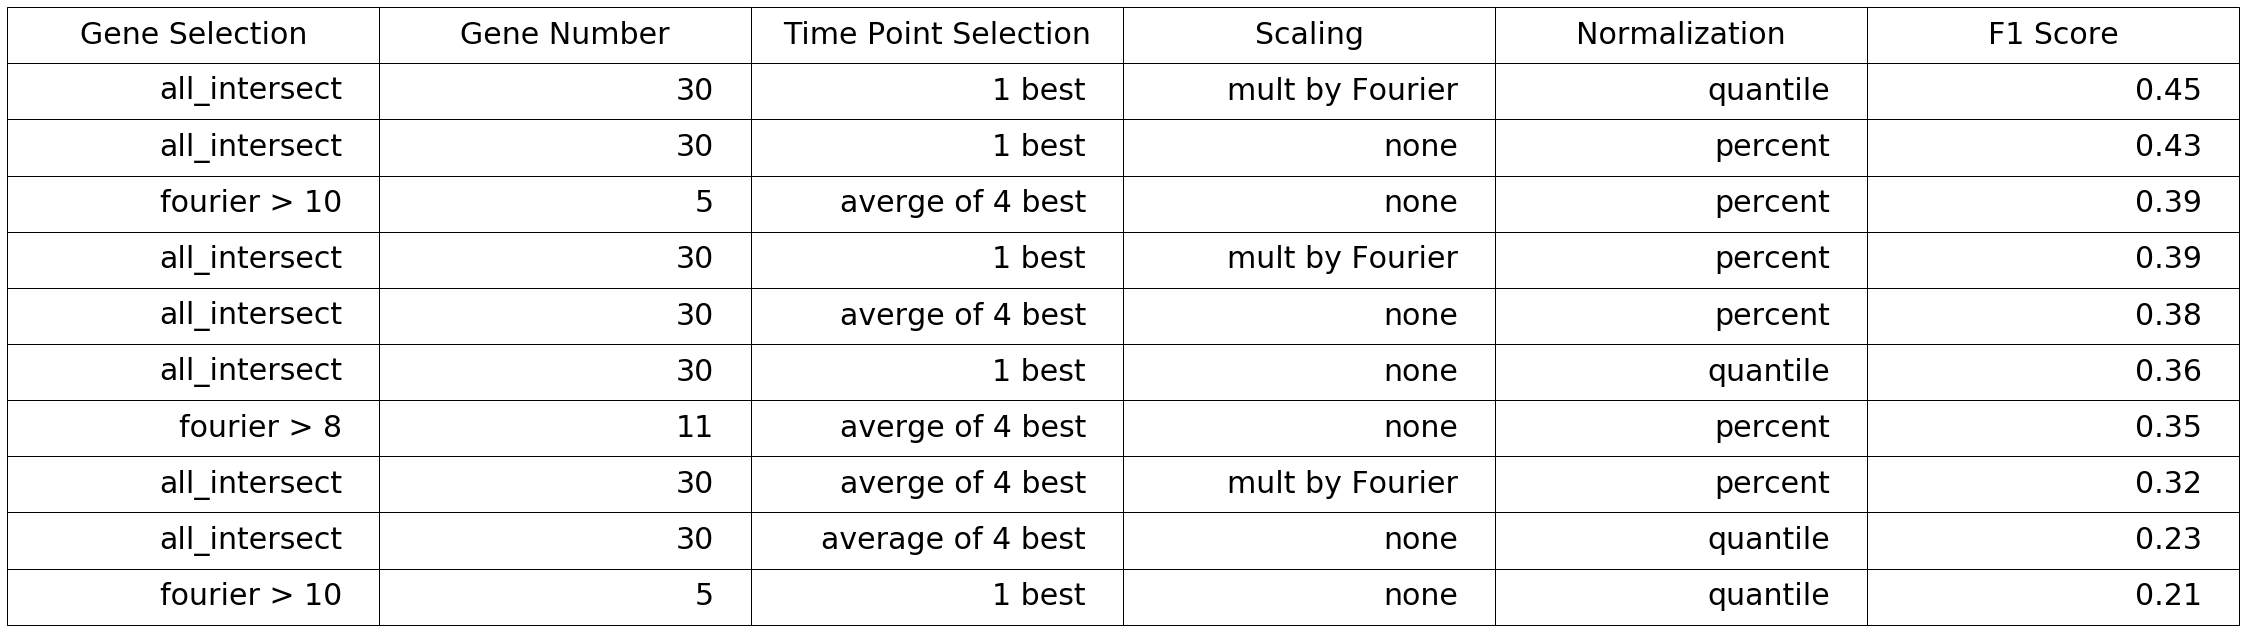

In [365]:
stahlberg_test_data = []
stahlberg_test_data.append(["all_intersect", "30", "1 best", "mult by Fourier", "quantile", "0.45"])
stahlberg_test_data.append(["all_intersect", "30", "1 best", "none", "percent", "0.43"])
stahlberg_test_data.append(["fourier > 10", "5", "averge of 4 best", "none", "percent", "0.39"])
stahlberg_test_data.append(["all_intersect", "30", "1 best", "mult by Fourier", "percent", "0.39"])
stahlberg_test_data.append(["all_intersect", "30", "averge of 4 best", "none", "percent", "0.38"])
stahlberg_test_data.append(["all_intersect", "30", "1 best", "none", "quantile", "0.36"])
stahlberg_test_data.append(["fourier > 8", "11", "averge of 4 best", "none", "percent", "0.35"])
stahlberg_test_data.append(["all_intersect", "30", "averge of 4 best", "mult by Fourier", "percent", "0.32"])
stahlberg_test_data.append(["all_intersect", "30", "average of 4 best", "none", "quantile", "0.23"])
stahlberg_test_data.append(["fourier > 10", "5", "1 best", "none", "quantile", "0.21"])

plt.figure(1, figsize=(20, 2))
plt.subplots_adjust(bottom = 0.1)
column_labels = ["Gene Selection", "Gene Number", "Time Point Selection", "Scaling", "Normalization", "F1 Score"]
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=stahlberg_test_data, colLabels=column_labels, loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(30)
the_table.scale(2, 2)
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.5)
plt.show()

In [336]:
whitfield_subset_micro_array_df.to_csv("whitfield_test_quantile.csv", sep='\t', index=True)
stahlberg_MCF7_subset_df.to_csv("stahlberg_test_quantile.csv", sep='\t', index=True)
print(whitfield_subset_micro_array_df.max(axis=1))

# try to get a larger dataset - mouseEST Cells from the paper with all the techniques - this 35 cell dataset is what they use for their predictor!!!!
# the values are log-normalized

## https://github.com/PMBio/cyclone/blob/master/py/core/load_data.py


In [383]:

import h5py
ftst = h5py.File("normCounts_mESCquartz.h5f",'r')
print([key for key in ftst.keys()])
print(ftst['cell_names'][:])

['KG1', 'KG2M', 'KS', 'K_phase', 'LogNcountsQuartz', 'LogVar_techQuartz_logfit', 'ccCBall_gene_indices', 'ccGO_gene_indices', 'cell_names', 'cellcyclegenesGO', 'gene_names_all', 'genes_heterogen', 'phase_vecG1', 'phase_vecG2M', 'phase_vecS', 'sym_namesQ']


In [427]:
# a bit slow, try not to re-run
import mygene
mg = mygene.MyGeneInfo()

gene_names_all = ftst['gene_names_all'][:]
gene_names_all = [x.decode('utf-8') for x in gene_names_all]
geneSyms = mg.querymany(gene_names_all, scopes='ensembl.gene', fields='symbol', species='mouse')
newGeneList = list()
for i in range(0, len(gene_names_all)):
    if 'symbol' in geneSyms[i]:
        newGeneList.append(geneSyms[i]['symbol'].upper())
    else:
        newGeneList.append(gene_names_all[i])

YT = ftst['LogNcountsQuartz'][:]
print(YT.shape)
labels_tst = ftst['phase_vecS'][:]*2+ftst['phase_vecG2M'][:]*3+ftst['phase_vecG1'][:]
print(labels_tst)
print(ftst["cell_names"][:])
# G1, S, G2M

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [459]:
string_labels = list()
cell_names = ftst["cell_names"][:]
cell_names = gene_names_all = [x.decode('utf-8') for x in cell_names]
for label in cell_names:
    if ("G1" in label):
        string_labels.append("G1")
    if ("S" in label):
        string_labels.append("S")
    if ("G2" in label):
        string_labels.append("G2")
mouseEST_35_df = pd.DataFrame(YT.T)
mouseEST_35_df.columns = cell_names
mouseEST_35_df.index = newGeneList

In [464]:
print(mouseEST_35_df.shape)
mouseEST_35_df = mouseEST_35_df[~mouseEST_35_df.index.duplicated(keep='first')]
print(mouseEST_35_df.shape)
print(mouseEST_35_df["ES_G1_1"]["BFAR"])

(36807, 35)
(36793, 35)
0.9468431505995761


In [436]:
print(whitfield_micro_array_df.shape)

(2830, 105)


In [445]:
import pandas as pd
tpm_df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct", sep='\t')
gene_name_to_tpm_dict = dict()
for index, row in tpm_df.iterrows():
    gene_name_to_tpm_dict[row["Description"]] = row["Skin - Sun Exposed (Lower leg)"]

In [446]:
# Read in the micro-array data - so far only founds matches between 1230 genes in whitfield in the 56K genes from GTEX
# TODO - get better name mapping
import math
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

gene_names_with_micro_array_data = list()

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
names_for_all_time_courses_list = list()
gene_name_to_time_course_expressions_dict = dict()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t4_" + str(i))
    
for index, row in whitfield_micro_array_df.iterrows():
    count +=1
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            #print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (gene_name in gene_name_to_tpm_dict and not(gene_name in gene_names_with_micro_array_data)):
                
                
                ####!!!! cut-off to have just a few top cycling genes
                scaled_fourier_score = float(row['Scaled Fourier'])
                #if (scaled_fourier_score < 10.0):
                 #   continue
                    
                tpm = gene_name_to_tpm_dict[gene_name]
                #print(gene_name + " is found")
                gene_names_with_micro_array_data.append(gene_name)
                count_found += 1
                gene_name_to_time_course_expressions_dict[gene_name] = dict()
                gene_name_to_time_course_expressions_dict[gene_name]["one"] = list()
                
                
                new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[11:31] = new_row
            
                new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[32:56] = new_row
                
                new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[57:81] = new_row
                
                new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[82:105] = new_row
                
                
                #TODO: for now adding zero to missing time courses and samples - valid for all things?
                
                for i in range(11,31):
                    gene_name_to_time_course_expressions_dict[gene_name]["one"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["two"] = list()
                for i in range(32,56):
                    gene_name_to_time_course_expressions_dict[gene_name]["two"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["three"] = list()
                for i in range(57,81):
                    gene_name_to_time_course_expressions_dict[gene_name]["three"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["four"] = list()
                for i in range(82,105):
                    gene_name_to_time_course_expressions_dict[gene_name]["four"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
    
                gene_name_to_time_course_expressions_dict[gene_name]["sine"] = row['Sin']
                gene_name_to_time_course_expressions_dict[gene_name]["cosine"] = row['Cos']
                gene_name_to_time_course_expressions_dict[gene_name]["phase"] = row['Phase'].strip()
                gene_name_to_time_course_expressions_dict[gene_name]["fourier_score"] = scaled_fourier_score
print(count_found)
#print(gene_name_to_time_course_expressions_dict['KLF6'])

#print(gene_name_to_time_course_expressions_dict["PITPNC1"])

1230


In [488]:
## subset micro-array and single-cell data for intersecting genes
count = 0
whitfield_subset_micro_array_df = pd.DataFrame(columns = range(0,91))
mouse_cell_cycle_genes_for_analysis = list()
for index, row in mouseEST_35_df.iterrows():
    if index in gene_names_with_micro_array_data:
        count += 1
        gene_name = index
        mouse_cell_cycle_genes_for_analysis.append(gene_name)
        whitfield_subset_micro_array_df.loc[gene_name] = gene_name_to_time_course_expressions_dict[gene_name]["one"] + gene_name_to_time_course_expressions_dict[gene_name]["two"] + gene_name_to_time_course_expressions_dict[gene_name]["three"] + gene_name_to_time_course_expressions_dict[gene_name]["four"]
mouseEST_35_subset_df = pd.DataFrame(mouseEST_35_df.loc[mouse_cell_cycle_genes_for_analysis])
print(count)

1100


In [466]:
# express each column as a percentage
whitfield_subset_micro_array_df = whitfield_subset_micro_array_df.div(whitfield_subset_micro_array_df.sum(axis=0))
mouseEST_35_subset_df = mouseEST_35_subset_df.div(mouseEST_35_subset_df.sum(axis=0))

def quantileNormalize(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic[col] = df[col].sort_values(na_position='first').values
    sorted_df = pd.DataFrame(dic)
    #rank = sorted_df.mean(axis = 1).tolist()
    rank = sorted_df.median(axis = 1).tolist()
    #sort
    for col in df:
        # compute percentile rank [0,1] for each score in column 
        t = df[col].rank( pct=True, method='max' ).values
        # replace percentile values in column with quantile normalized score
        # retrieve q_norm score using calling rank with percentile value
        df[col] = [ np.nanpercentile( rank, i*100 ) if ~np.isnan(i) else np.nan for i in t ]
    return df

#whitfield_subset_micro_array_df = quantileNormalize(whitfield_subset_micro_array_df)
#mouseEST_35_subset_df =  quantileNormalize(mouseEST_35_subset_df)

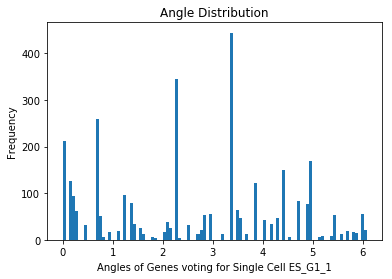

2.94938126014004
number of times this cell has scExpression value outside of microarray range:
66
out of high (>8) score fourier genes
86
predicted phase
G2M


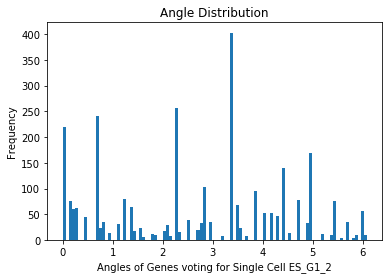

3.3069503406706295
number of times this cell has scExpression value outside of microarray range:
58
out of high (>8) score fourier genes
76
predicted phase
G2M


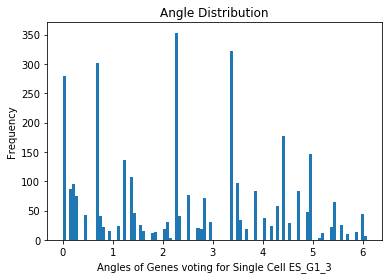

1.5428999141575488
number of times this cell has scExpression value outside of microarray range:
63
out of high (>8) score fourier genes
90
predicted phase
S


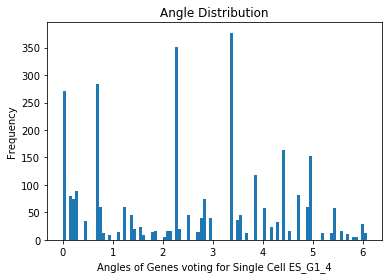

2.825513661746867
number of times this cell has scExpression value outside of microarray range:
69
out of high (>8) score fourier genes
85
predicted phase
G2M


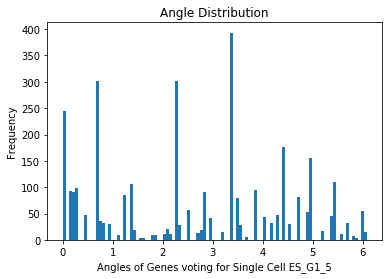

5.960325104008715
number of times this cell has scExpression value outside of microarray range:
64
out of high (>8) score fourier genes
85
predicted phase
-1


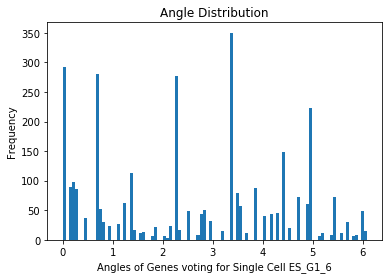

6.067308567206283
number of times this cell has scExpression value outside of microarray range:
61
out of high (>8) score fourier genes
78
predicted phase
-1


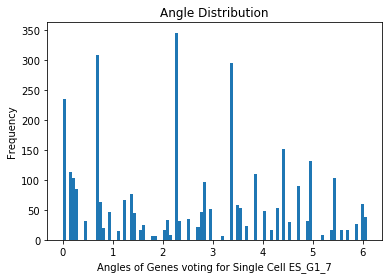

1.1689134788986648
number of times this cell has scExpression value outside of microarray range:
66
out of high (>8) score fourier genes
91
predicted phase
S


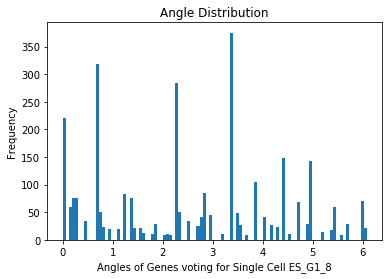

1.8540637909776114
number of times this cell has scExpression value outside of microarray range:
54
out of high (>8) score fourier genes
75
predicted phase
S


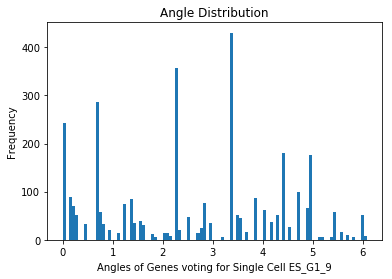

2.866992623518824
number of times this cell has scExpression value outside of microarray range:
71
out of high (>8) score fourier genes
90
predicted phase
G2M


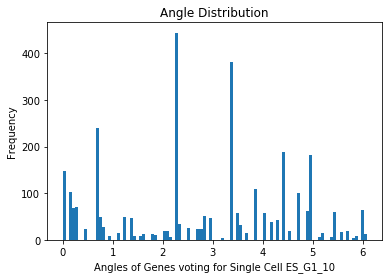

3.4059486374802876
number of times this cell has scExpression value outside of microarray range:
61
out of high (>8) score fourier genes
79
predicted phase
G2M


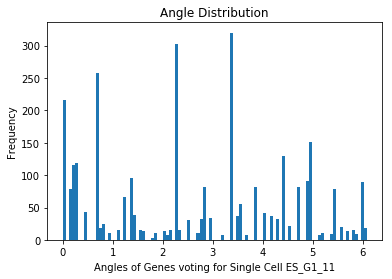

0.10531671531488937
number of times this cell has scExpression value outside of microarray range:
64
out of high (>8) score fourier genes
85
predicted phase
S


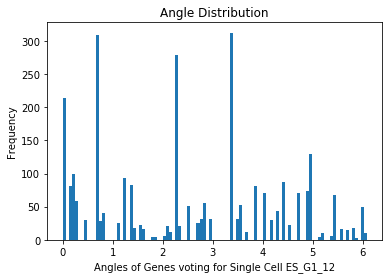

1.085299652389415
number of times this cell has scExpression value outside of microarray range:
55
out of high (>8) score fourier genes
77
predicted phase
S


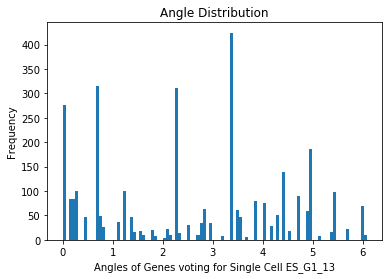

6.040988852945255
number of times this cell has scExpression value outside of microarray range:
69
out of high (>8) score fourier genes
87
predicted phase
-1


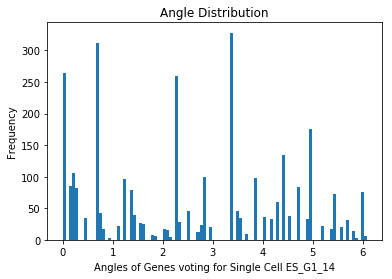

0.24375485935235675
number of times this cell has scExpression value outside of microarray range:
61
out of high (>8) score fourier genes
84
predicted phase
S


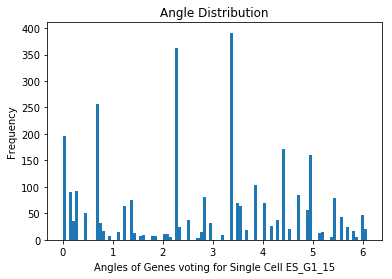

3.7722780097378474
number of times this cell has scExpression value outside of microarray range:
58
out of high (>8) score fourier genes
80
predicted phase
G2M


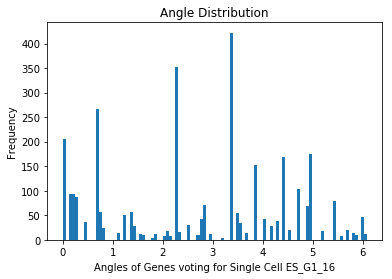

3.893981638017644
number of times this cell has scExpression value outside of microarray range:
69
out of high (>8) score fourier genes
86
predicted phase
G2M


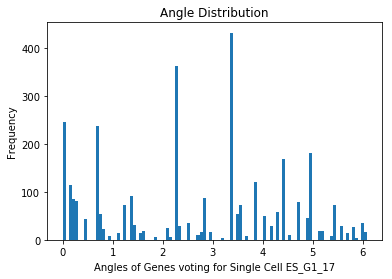

3.619765942414529
number of times this cell has scExpression value outside of microarray range:
67
out of high (>8) score fourier genes
87
predicted phase
G2M


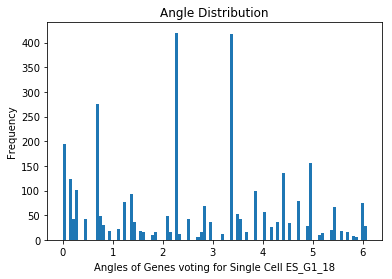

2.14181876728555
number of times this cell has scExpression value outside of microarray range:
69
out of high (>8) score fourier genes
88
predicted phase
G2M


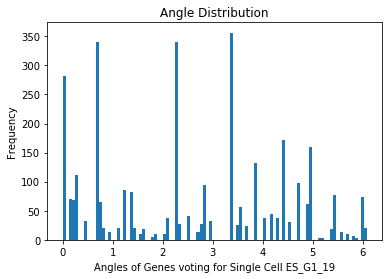

0.8600652130988877
number of times this cell has scExpression value outside of microarray range:
64
out of high (>8) score fourier genes
87
predicted phase
S


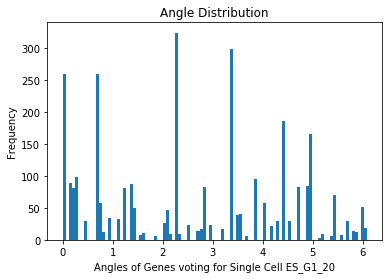

0.3867919553977673
number of times this cell has scExpression value outside of microarray range:
60
out of high (>8) score fourier genes
85
predicted phase
S


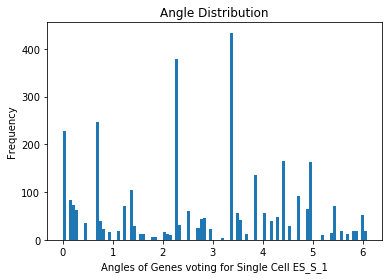

3.269532633922457
number of times this cell has scExpression value outside of microarray range:
70
out of high (>8) score fourier genes
87
predicted phase
G2M


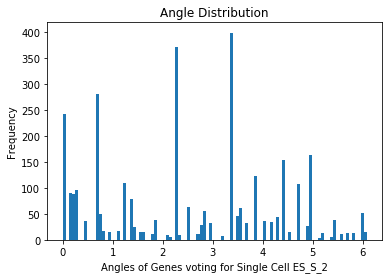

2.3245965617830535
number of times this cell has scExpression value outside of microarray range:
60
out of high (>8) score fourier genes
84
predicted phase
G2M


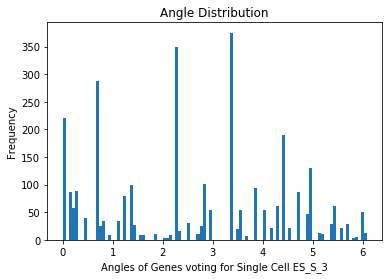

2.873388768202688
number of times this cell has scExpression value outside of microarray range:
61
out of high (>8) score fourier genes
82
predicted phase
G2M


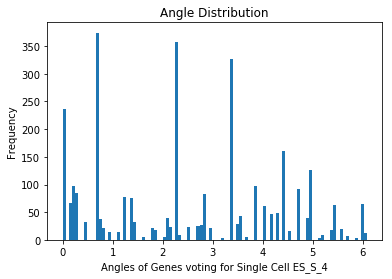

1.3326920719772581
number of times this cell has scExpression value outside of microarray range:
58
out of high (>8) score fourier genes
84
predicted phase
S


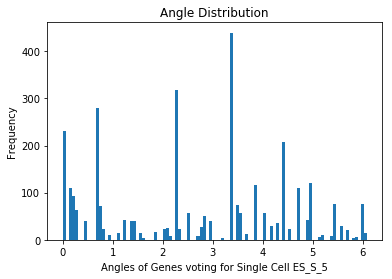

3.818589488525366
number of times this cell has scExpression value outside of microarray range:
68
out of high (>8) score fourier genes
92
predicted phase
G2M


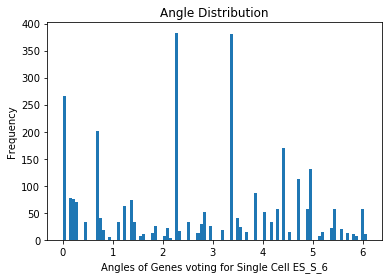

3.394573046854878
number of times this cell has scExpression value outside of microarray range:
65
out of high (>8) score fourier genes
84
predicted phase
G2M


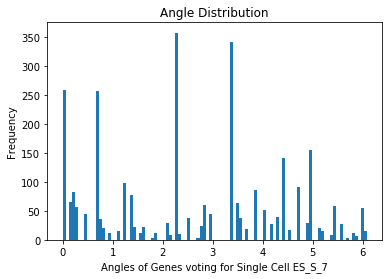

2.0298613390270575
number of times this cell has scExpression value outside of microarray range:
66
out of high (>8) score fourier genes
87
predicted phase
G2M


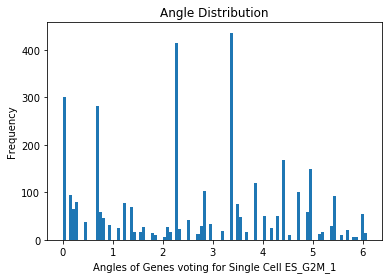

2.6418531854147633
number of times this cell has scExpression value outside of microarray range:
75
out of high (>8) score fourier genes
97
predicted phase
G2M


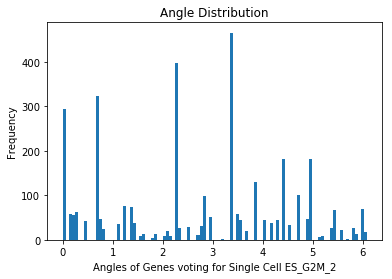

3.2967868686031796
number of times this cell has scExpression value outside of microarray range:
71
out of high (>8) score fourier genes
95
predicted phase
G2M


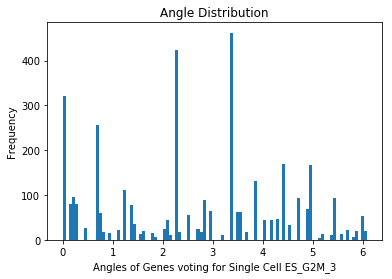

2.9145162714603066
number of times this cell has scExpression value outside of microarray range:
81
out of high (>8) score fourier genes
102
predicted phase
G2M


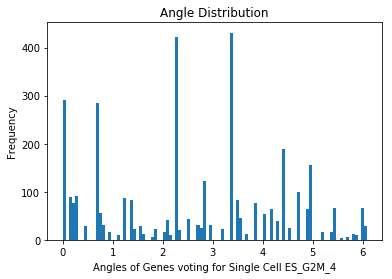

2.6638925291327507
number of times this cell has scExpression value outside of microarray range:
81
out of high (>8) score fourier genes
96
predicted phase
G2M


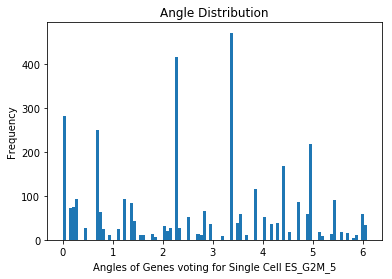

3.002483822357242
number of times this cell has scExpression value outside of microarray range:
70
out of high (>8) score fourier genes
98
predicted phase
G2M


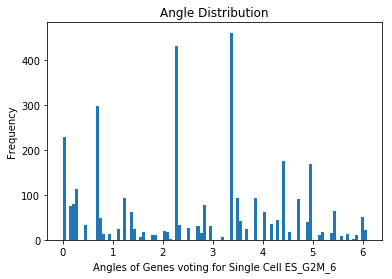

2.8957085929839836
number of times this cell has scExpression value outside of microarray range:
78
out of high (>8) score fourier genes
94
predicted phase
G2M


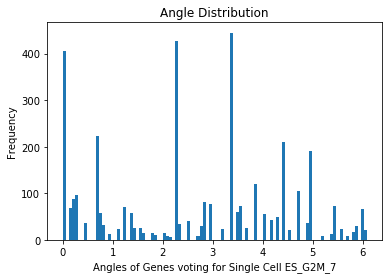

3.6441679628804295
number of times this cell has scExpression value outside of microarray range:
77
out of high (>8) score fourier genes
105
predicted phase
G2M


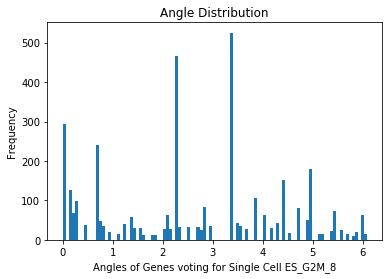

2.7809468573478133
number of times this cell has scExpression value outside of microarray range:
80
out of high (>8) score fourier genes
99
predicted phase
G2M


In [482]:
mouseEST_35_our_assignment_tupples_list = list()
for cell_name in mouseEST_35_subset_df:    
    all_genes_angle_list = list()
    all_genes_sine_sum = 0
    all_genes_cosine_sum = 0
    count = 0
    count_scRNA_outside_whitfield_range = 0
    count_high_fourier_score_genes = 0
    for gene_name in mouse_cell_cycle_genes_for_analysis:
        #print(cell_name)
        #print(gene_name)
        expression_scRNA = mouseEST_35_subset_df[cell_name][gene_name]
        if (not expression_scRNA): # no reads in single cell, do not consider
            #print("nothing for gene " + gene_name)
            continue

        #if (gene_name == 'PITPNC1'):
         #   print(whitfield_subset_micro_array_df.loc[gene_name])

        # process the first time course
        best_diff_1 = math.inf
        best_angle_1 = -1
        for i in range(0, 20):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+0] - expression_scRNA)
            if (diff < best_diff_1 and (whitfield_subset_micro_array_df.loc[gene_name][i+0] != 0)):
                best_diff_1 = diff
                best_angle_1 = time_course_1_angles_list[i]


        #print(whitfield_subset_micro_array_df.loc[gene_name])
        #print(best_diff_1)
        #print(best_angle_1)
        # process the second time course
        best_diff_2 = math.inf
        best_angle_2 = -1
        for i in range(0, 24):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+20] - expression_scRNA)
            if (diff < best_diff_2 and (whitfield_subset_micro_array_df.loc[gene_name][i+20] != 0)):
                best_diff_2 = diff
                best_angle_2 = time_course_2_angles_list[i]



        #print(whitfield_subset_micro_array_df.loc[gene_name][20:44])
        #print(best_diff_2)
        #print(best_angle_2)
        # process the third time course
        best_diff_3 = math.inf
        best_angle_3 = -1
        for i in range(0, 24):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+44] - expression_scRNA)
            if (diff < best_diff_3):
                best_diff_3 = diff
                best_angle_3 = time_course_3_angles_list[i]
        #print(whitfield_subset_micro_array_df.loc[gene_name][44:68])
        #print(best_diff_3)
        #print(best_angle_3)
        # process the first time course
        best_diff_4 = math.inf
        best_angle_4 = -1
        for i in range(0, 23):
            diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+68] - expression_scRNA)
            if (diff < best_diff_4):
                best_diff_4 = diff
                best_angle_4 = time_course_4_angles_list[i]
        #print(whitfield_subset_micro_array_df.loc[gene_name][68:91])
        #print(best_diff_4)
        #print(best_angle_4)

        #print(gene_name)
        count += 1
        #print(expression_scRNA)

        sin_sum = 0
        cos_sum = 0
        if (best_angle_1 != -1):
            sin_sum += math.sin(best_angle_1)
            cos_sum += math.cos(best_angle_1)
        if (best_angle_2 != -1):
            sin_sum += math.sin(best_angle_2)
            cos_sum += math.cos(best_angle_2)
        if (best_angle_3 != -1):
            sin_sum += math.sin(best_angle_3)
            cos_sum += math.cos(best_angle_3)
        if (best_angle_4 != -1):
            sin_sum += math.sin(best_angle_4)
            cos_sum += math.cos(best_angle_4)

        average_gene_angle = math.atan2(sin_sum, cos_sum)
        if (average_gene_angle < 0):
            average_gene_angle += 2*math.pi
        #TRY - just the first time course
        
        
        # HERE, try to use the best of the 4 angles
        if (best_diff_1 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_1
        elif (best_diff_2 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_2
        elif (best_diff_3 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_3
        elif (best_diff_4 == min((best_diff_1, best_diff_2, best_diff_3, best_diff_4))):
            average_gene_angle = best_angle_4
        
        #average_gene_angle = best_angle_1

        repeat = round(gene_name_to_time_course_expressions_dict[gene_name]["fourier_score"])
        if (repeat >= 8):
            count_high_fourier_score_genes += 1
            if ((expression_scRNA < min(whitfield_subset_micro_array_df.loc[gene_name])) or (expression_scRNA  > max(whitfield_subset_micro_array_df.loc[gene_name]))):
                count_scRNA_outside_whitfield_range += 1
        
        for i in range(0,repeat):
            all_genes_sine_sum += math.sin(average_gene_angle)
            all_genes_cosine_sum += math.cos(average_gene_angle)
            all_genes_angle_list.append(average_gene_angle)
        
        #print(average_gene_angle)
        #if (count >3):
        #    break
    
    import matplotlib.pyplot as plt
    plt.hist(all_genes_angle_list, bins=100)
    plt.xlabel('Angles of Genes voting for Single Cell ' + cell_name)
    plt.ylabel('Frequency')
    plt.title('Angle Distribution')
    plt.show()
    average_angle_across_all_genes = math.atan2(all_genes_sine_sum, all_genes_cosine_sum)
    #print(average_angle_across_all_genes)
    if (average_angle_across_all_genes < 0):
        average_angle_across_all_genes += 2*math.pi
    print(average_angle_across_all_genes)
    predicted_phase = -1
    if average_angle_across_all_genes >= 0 and average_angle_across_all_genes <= 2:
        predicted_phase = "S"
    elif average_angle_across_all_genes > 2 and average_angle_across_all_genes <= 4.8:
        predicted_phase = "G2M"
    elif average_angle_across_all_genes > 4.8 and average_angle_across_all_genes <= 5.9:
        predicted_phase = "G1"
    elif angles_list[i] > 5.9:
        predicted_phase = "S"
    print("number of times this cell has scExpression value outside of microarray range:")
    print(count_scRNA_outside_whitfield_range)
    print("out of high (>8) score fourier genes")
    print(count_high_fourier_score_genes)
    print("predicted phase")
    print(predicted_phase)
    mouseEST_35_our_assignment_tupples_list.append((cell_name, predicted_phase))

In [463]:
print(mouseEST_35_subset_df[cell_name][gene_name])

BFAR    0.001315
BFAR    0.000010
BFAR    0.001315
BFAR    0.000010
Name: ES_G1_1, dtype: float64


In [469]:
S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0    
 
for (cell_name, predicted_phase) in mouseEST_35_our_assignment_tupples_list:
    if ("S" in cell_name):
        if (predicted_phase == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (predicted_phase == "G2M"):
                G2M_fp += 1
            elif (predicted_phase == "G1"):
                G1_fp += 1
    elif ("G2" in cell_name):        
        if (predicted_phase == "G2M"):
            G2M_tp += 1        
        else:
            G2M_fn += 1
            if (predicted_phase == "S"):
                S_fp += 1
            elif (predicted_phase == "G1"):
                G1_fp += 1
    elif ("G1" in cell_name):
        if (predicted_phase == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (predicted_phase == "S"):
                S_fp += 1
            elif (predicted_phase == "G2M"):
                G2M_fp += 1 

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

F1_score
0.13636363636363635


In [485]:
for cell_name in mouseEST_35_subset_df:    
    all_genes_angle_list = list()
    all_genes_sine_sum = 0
    all_genes_cosine_sum = 0
    count = 0
    print(cell_name)
    count_scRNA_outside_whitfield_range = 0
    count_high_fourier_score_genes = 0
    count_zero_genes = 0
    for gene_name in mouse_cell_cycle_genes_for_analysis:
        expression_scRNA = mouseEST_35_subset_df[cell_name][gene_name]
        if (not expression_scRNA):
            count_zero_genes += 1
    print(count_zero_genes)

ES_G1_1
446
ES_G1_2
496
ES_G1_3
424
ES_G1_4
492
ES_G1_5
421
ES_G1_6
432
ES_G1_7
433
ES_G1_8
475
ES_G1_9
443
ES_G1_10
479
ES_G1_11
486
ES_G1_12
525
ES_G1_13
449
ES_G1_14
462
ES_G1_15
478
ES_G1_16
468
ES_G1_17
451
ES_G1_18
442
ES_G1_19
436
ES_G1_20
476
ES_S_1
440
ES_S_2
454
ES_S_3
465
ES_S_4
477
ES_S_5
450
ES_S_6
497
ES_S_7
516
ES_G2M_1
386
ES_G2M_2
395
ES_G2M_3
366
ES_G2M_4
384
ES_G2M_5
398
ES_G2M_6
416
ES_G2M_7
367
ES_G2M_8
375


# Summary:   got F1 scores for Stahlberg set, and for 35_cell_mouseEST sets
## they are low and terrible;  main take-aways
## 1) use percentages, not quantile normalization; the way I computed percentages is wrong - get the micro-array percentages for EACH cell, taking into account only the non-zero genes for that cell - hope that now the percentages will be good;
## 2) do not pick a single best vote - develop for each gene a model - fit a curve line (sine curve), and see what the errors are at each point;  then each single cell value becomes a probability at each point....  then combine the probabilities 

## Feed 35_cell_mouseEST Dataset to Seurat to get phase assignments, and get F1 score

In [500]:
# MouseEST 35 1:3 RUN this cell for mouseEST

import h5py
ftst = h5py.File("normCounts_mESCquartz.h5f",'r')
print([key for key in ftst.keys()])
print(ftst['cell_names'][:])



['KG1', 'KG2M', 'KS', 'K_phase', 'LogNcountsQuartz', 'LogVar_techQuartz_logfit', 'ccCBall_gene_indices', 'ccGO_gene_indices', 'cell_names', 'cellcyclegenesGO', 'gene_names_all', 'genes_heterogen', 'phase_vecG1', 'phase_vecG2M', 'phase_vecS', 'sym_namesQ']
[b'ES_G1_1' b'ES_G1_2' b'ES_G1_3' b'ES_G1_4' b'ES_G1_5' b'ES_G1_6'
 b'ES_G1_7' b'ES_G1_8' b'ES_G1_9' b'ES_G1_10' b'ES_G1_11' b'ES_G1_12'
 b'ES_G1_13' b'ES_G1_14' b'ES_G1_15' b'ES_G1_16' b'ES_G1_17' b'ES_G1_18'
 b'ES_G1_19' b'ES_G1_20' b'ES_S_1' b'ES_S_2' b'ES_S_3' b'ES_S_4' b'ES_S_5'
 b'ES_S_6' b'ES_S_7' b'ES_G2M_1' b'ES_G2M_2' b'ES_G2M_3' b'ES_G2M_4'
 b'ES_G2M_5' b'ES_G2M_6' b'ES_G2M_7' b'ES_G2M_8']


In [501]:
# MouseEST 35 2:3 RUN this cell for mouseEST
# a bit slow, try not to re-run
import mygene
mg = mygene.MyGeneInfo()

gene_names_all = ftst['gene_names_all'][:]
gene_names_all = [x.decode('utf-8') for x in gene_names_all]
geneSyms = mg.querymany(gene_names_all, scopes='ensembl.gene', fields='symbol', species='mouse')
newGeneList = list()
for i in range(0, len(gene_names_all)):
    if 'symbol' in geneSyms[i]:
        newGeneList.append(geneSyms[i]['symbol'].upper())
    else:
        newGeneList.append(gene_names_all[i])

YT = ftst['LogNcountsQuartz'][:]
print(YT.shape)
labels_tst = ftst['phase_vecS'][:]*2+ftst['phase_vecG2M'][:]*3+ftst['phase_vecG1'][:]
print(labels_tst)
print(ftst["cell_names"][:])
# G1, S, G2M

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [504]:
# MouseEST 35 3:3 RUN this cell for mouseEST
string_labels = list()
cell_names = ftst["cell_names"][:]
cell_names = gene_names_all = [x.decode('utf-8') for x in cell_names]
for label in cell_names:
    if ("G1" in label):
        string_labels.append("G1")
    if ("S" in label):
        string_labels.append("S")
    if ("G2" in label):
        string_labels.append("G2")
SC_df = pd.DataFrame(YT.T)
SC_df.columns = cell_names
SC_df.index = newGeneList

print(SC_df.shape)
SC_df = SC_df[~SC_df.index.duplicated(keep='first')]
print(SC_df.shape)
print(SC_df["ES_G1_1"]["BFAR"])

(36807, 35)
(36793, 35)
0.9468431505995761


In [505]:
SC_df.to_csv("mESCquartz_as_sc.csv", sep='\t', index=True)

In [506]:
mESCquartz_seurat_df = pd.read_csv("labels_mESCquartz_as_sc.csv", sep=',')

S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0

all_count = 0
correct_count = 0
for index, row in mESCquartz_seurat_df.iterrows():
    all_count += 1
    if ("_G1" in row[0] and row["Phase"] == "G1"):
        correct_count += 1
    if ("_S" in row[0] and row["Phase"] == "S"):
        correct_count += 1  
    if ("_G2" in row[0] and row["Phase"] == "G2M"):
        correct_count += 1
    
    if ("_S" in row[0]):
        if (row["Phase"] == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (row["Phase"] == "G2M"):
                G2M_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G2" in row[0]):
        if (row["Phase"] == "G2M"):
            G2M_tp += 1
        else:
            G2M_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G1" in row[0]):
        if (row["Phase"] == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G2M"):
                G2M_fp += 1 

print("Correct Count out of 91")
print(correct_count)
print("Percent Accuracy")
print(correct_count/all_count)

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

Correct Count out of 91
13
Percent Accuracy
0.37142857142857144
F1_score
0.4441142857142857
